# Мастарская Яндекс Практикум

## Исследование вакансий для Аналиттиков данных и Системных аналитиков на основе данных портала HH.ru

Описание проекта

* **Цель исследования:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков

* **Ход исследования:**
    * Получение данных - заказчиком предоставлен датасет с вакансиями портала HH.ru, на начальном этапе отмечается, что данные сырые и требуют предобработки
    * Обзор полученных данных
    * Предобработка данных
    * Исследовательский анализ данных
    * Подготовка выводов и отчета

* **Исходные данные:**
    * Выгрузки вакансий аналитиков данных и системных аналитиков с портала HH.ru

**Содержание отчета:**
1. **Загрузка данных и подготовка к анализу**
    * Загрузка библиотек и открытие датасетов
    * Обработка пропусков и дубликатов
    * Обработка типов данных
    * Выводы по подготовке данных
2. **Исследовательский анализ данных**
    * Название вакансий
    * Дата публикации вакансий
    * Статусы вакансиий на момент получения данных
    * Работодатели
    * Регион места работы
    * Требуемый опыт работы
    * Ключевые навыки
    * График работы
    * Тип занятости
    * Зарплаты
    * Hard skills
    * Soft Skills
    * Выводы по исследовательскому анализу данных
3. **Грейды требуемых специалистов**
    * Выводы по исследованию требуемых грейдов в вакансиях
4. **Типичное место работы аналитика**
    * Типичное место работы аналитика данных
      * ТОП работодателей
      * Зарплата
      * Тип занятости
      * График работы
      * Выводы по типичному месту работы аналитика данных
    * Типичное место работы системного аналитика
      * ТОП работодателей
      * Зарплата
      * Тип занятости
      * График работы
      * Выводы по типичному месту работы системного аналитика
    * Выводы по исследованию типичного места работы аналитика
5. **Требования к Hard и Softskills**
      * Какие навыки спрашивают чаще - твердые или мягкие?
      * К какому грейду и к какой специальности требований больше
      * Наиболее желаемые кандидаты на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils
        * Аналитик данных: самые важные hard-skills, самые важные soft-skills
        * Системный аналитик: самые важные hard-skills, самые важные soft-skills
      * Выводы по исследования требований к hard и soft skills для вакансий аналитиков данных и системных аналитиков
6. **Общие выводы и рекомендации**

## 1. Загрузка данных и подготовка к анализу

### 1.1. Загрузка библиотек и открытие датасетов

In [ ]:
# Установка библиотеки wordcloud (для создания облака слов)
#pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore')

In [ ]:
da_df, sa_df = (
    pd.read_excel('vacancies_da.xlsx'), # Вакансии аналитиков данных
    pd.read_excel('vacancies_sa.xlsx') # Вакансии системных аналитиков
)

In [ ]:
# Посмотрим информацию о df_da
da_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [ ]:
# Посмотрим информацию о sa_df
sa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

Ожидаемо струтктура датафремов одинаковая, следовательно их можно объеденить в один, предварительно добавив в каждый метку вакансии к которой он относится (может пригодиться в дальнейшем)

In [ ]:
# Добавим метки к датасетам
da_df['label'] = 'DA'
sa_df['label'] = 'SA'

In [ ]:
# Объеденим два датасета в один
raw_df = pd.concat([da_df, sa_df], axis=0)

In [ ]:
# Проверим получившийся датасет
raw_df.sample(10)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,label
1031,96495717,"Главный специалист (сбор, анализ и контроль ка...",2024-04-09 09:45:17,https://hh.ru/vacancy/96495717,Открытая,Газпром,NaN,Санкт-Петербург,Middle (3-6 years),[],...,Полная занятость,требования: высшее образование (не ниже магис...,требование высокий образование низкий магистра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,DA
1347,97836831,Data Analyst GigaChat,2024-04-24 17:51:05,https://hh.ru/vacancy/97836831,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],...,Полная занятость,кластер аналитики расширяет команду для лучшег...,кластер аналитик расширять команда хороший уче...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,DA
162,101400897,Системный аналитик BI,2024-07-03 09:30:06,https://hh.ru/vacancy/101400897,Открытая,Агропромкомплектация,NaN,Москва,Junior+ (1-3 years),"['Scrum', 'MS SQL', '1С: Зарплата и управление...",...,Полная занятость,группа компаний «агропромкомплектация» - одно ...,группа компания агропромкомплектация ведущий р...,NaN,NaN,ЗП не указана,"BPMN, UI/UX, Модели данных, Agile Project Mana...",NaN,NaN,SA
962,96093083,Аналитик данных (Геоаналитика),2024-05-03 09:42:17,https://hh.ru/vacancy/96093083,Открытая,WILDBERRIES,NaN,Москва,Middle (3-6 years),"['Анализ данных', 'SQL', 'Python', 'Работа с б...",...,Полная занятость,wildberries – это крупнейший маркетплейс росси...,wildberries крупный маркетплейс россия миллион...,NaN,NaN,ЗП не указана,"Анализ данных, Python, SQL, Работа с большим о...",Pandas,NaN,DA
1375,97941141,Data Analyst,2024-04-25 21:58:06,https://hh.ru/vacancy/97941141,Открытая,МегаФон,"МегаФон, IT",Москва,Middle (3-6 years),"['MS SQL', 'SQL', 'A/B тесты', 'Python', 'Анал...",...,Полная занятость,"чем предстоит заниматься генерировать идеи, и...",предстоять заниматься генерировать идея искать...,NaN,NaN,ЗП не указана,"SQL, Python, A/B тесты, MS SQL, Аналитика",NaN,NaN,DA
1325,97758629,Аналитик данных BI / ЩЛЗ,2024-04-23 21:41:03,https://hh.ru/vacancy/97758629,Открытая,ДОМ.РФ,ДОМ.РФ ИТ,Щербинка,Junior+ (1-3 years),[],...,Полная занятость,"ао «щлз» – флагман российского лифтостроения, ...",ао щлз флагман российский лифтостроение работа...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,DA
1229,103500723,Системный аналитик,2024-07-08 13:09:42,https://hh.ru/vacancy/103500723,Открытая,BAUM,NaN,Москва,Middle (3-6 years),['Переговоры'],...,Полная занятость,нейросети и облачные дата-центры немыслимы без...,нейросеть облачный дата центр немыслимый специ...,NaN,NaN,ЗП не указана,NaN,NaN,Переговоры,SA
83,101095176,Lead system analyst,2024-07-01 13:37:27,https://hh.ru/vacancy/101095176,Открытая,BI.ZONE,BI.ZONE Направление Разработка,Москва,Middle (3-6 years),"['System Analysis', 'Коммуникация', 'Документа...",...,Полная занятость,bi.zone создает it-продукты для обеспечения ки...,bi zone создавать it продукт обеспечение кибер...,NaN,NaN,ЗП не указана,"System Analysis, UML",NaN,"Коммуникация, Документация",SA
1232,97348670,Аналитик данных (направление CRM),2024-04-18 16:42:06,https://hh.ru/vacancy/97348670,Открытая,Почта Банк,Почта Банк. Экспертам и руководителям,Москва,Junior+ (1-3 years),"['Sas', 'SQL', 'Python', 'MS Excel', 'Data Ana...",...,Полная занятость,чем предстоит заниматься: анализ эффективност...,предстоять заниматься анализ эффективность про...,NaN,NaN,ЗП не указана,"Data Analyst, SQL, MS Excel, Sas, Python",NaN,NaN,DA
1092,103344366,Системный аналитик (Platform V Monitor),2024-07-05 10:17:00,https://hh.ru/vacancy/103344366,Открытая,SberTech,NaN,Москва,Middle (3-6 years),"['confluence', 'Документация', 'Проактивность']",...,Полная занятость,platform v monitor - это отечественная система...,platform v monitor отечественный система компл...,NaN,NaN,ЗП не указана,NaN,confluence,"Документация, Проактивность",SA


### 1.2. Обработка пропусков и дубликатов

In [ ]:
# Проверим количество пропусков в датасете (процент от всех значений)
raw_df.isnull().mean() * 100

,0
id,0.000000
name,0.000000
published_at,0.000000
alternate_url,0.000000
type,0.000000
employer,0.000000
department,76.264801
area,0.000000
experience,0.000000
key_skills,0.000000


Больше всего данных пропущенно в колонках:
* department (76%)
* salary_from (81%)
* salary_to (86%)
* key_skills_from_key_skills_field (36%)
* hard_skills_from_description (73%)
* soft_skills_from_description (46%)

In [ ]:
# Удалим колонку department с 76% пропусков, при этом остается колонка с наименованием компании, для задач исследования ее должно быть достаточно. Предобработанный датасет сохраним в новой переменной
clear_df = raw_df.copy()
clear_df = clear_df.drop(columns='department')

Пропуски в колонках с указанием зарплатной вилки заполнять не будем, так как это может исказить результаты исследования.

In [ ]:
# Пропуски в колонках key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description заполним заглушкой "НД" (нет данных)
clear_df['key_skills_from_key_skills_field'] = clear_df['key_skills_from_key_skills_field'].fillna('НД')

clear_df['hard_skills_from_description'] = clear_df['hard_skills_from_description'].fillna('НД')

clear_df['soft_skills_from_description'] = clear_df['soft_skills_from_description'].fillna('НД')

In [ ]:
# Проверим наличие явных дубликатов
clear_df.duplicated().sum()

np.int64(0)

Явных дубликатов не обнаружено, могут быть неявные дубликаты связанные с ошибками в написании, разным регистром, лишними знаками и т.д.

In [ ]:
# Проверим дубликаты по полю id
clear_df['id'].duplicated().sum()

np.int64(5)

In [ ]:
# Проверим задублированные id
clear_df.query('id.duplicated()')

,id,name,published_at,alternate_url,type,employer,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,label
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,SA
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,НД,confluence,Документация,SA
33,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,НД,confluence,Документация,SA
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",НД,Документация,SA
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",Полный день,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",НД,НД,SA


In [ ]:
# Выборочно посмотрим найденные дубликаты id
clear_df.query('id==100581829')

,id,name,published_at,alternate_url,type,employer,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,label
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,DA
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",Полный день,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,SA


Запись с одинаковым id действительно похожа на дубликат, при этом у двух записей отличается время публикации, key_skills.
Удалим найденные дубликаты.

In [ ]:
clear_df = clear_df.query('~id.duplicated()').copy()

### 1.3. Обработка типов данных

In [ ]:
# Проверим типы данных
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3711 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3711 non-null   int64         
 1   name                              3711 non-null   object        
 2   published_at                      3711 non-null   datetime64[ns]
 3   alternate_url                     3711 non-null   object        
 4   type                              3711 non-null   object        
 5   employer                          3711 non-null   object        
 6   area                              3711 non-null   object        
 7   experience                        3711 non-null   object        
 8   key_skills                        3711 non-null   object        
 9   schedule                          3711 non-null   object        
 10  employment                        3711 non-null   obj

Замечаний к типам полей нет, все корректно.

### 1.4. Выводы по подготовке данных

1. Исходные датасеты содержали сопоставимое количество вакансий по направлению Аналитик данных (1801) и Системный аналитик (1915)
2. Два датасета объединены в один
3. Удален столбец с наименованием подразделения компании (76% пропусков)
4. Пропуски зарплатной вилки не заполнялись во избежание искажения результатов исследования
5. Остальные пропуски заполнены заглушкой "НД" (нет данных)
6. В объединенном датасете содержится информация о 3711 вакансиях.

В датасете содержится следующая информация:
* id - Уникальный идентификатор вакансии.
* name - Название вакансии.
* published_at - Дата публикации.
* alternate_url - Ссылка на вакансию.
* type - Статус вакансии на момент получения данных от api и передачи
их в базу.
* employer - Работодатель.
* area - Регион места работы.
* experience - Требуемый опыт работы.
* key_skills - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api.
* schedule - График работы.
* employment - Тип занятости.
* description - Описание вакансии.
* description_lemmatized - Лемматизированное описание вакансии.
* salary_from - Нижняя граница предлагаемой заработной платы.
* salary_to - Верхняя граница предлагаемой заработной платы.
* salary_bin - Категория зарплаты.
* key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.
* hard_skills_from_description - “Твердые” навыки, найденные при
обработке полей с навыками. Поле генерируется после получения
информации от api.
* soft_skills_from_description - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после
получения информации от api.

## 2. Исследовательский анализ данных

### 2.1. Название вакансий

In [ ]:
clear_df['name'].unique().tolist()

['Junior аналитик данных (исследователь)',
 'Аналитик данных',
 'Аналитик данных (исследователь)',
 'Ведущий аналитик данных',
 'Senior Data Analyst (Цифровой билайн)',
 'Дата аналитик',
 'Data Analyst',
 'Data Analyst / Data Scientist',
 'Продуктовый аналитик / Data Analyst',
 'Data analyst / Аналитик данных',
 'Аналитик данных (Отдел по анализу конкурентов)',
 'Аналитик данных (в офисе)',
 'Data analyst',
 'Аналитик данных в клиентский сервис',
 'Аналитик данных (антифрод)',
 'Аналитик данных (Data Analyst)',
 'Старший аналитик данных (клиентский опыт)',
 'Senior Data Analyst (Ads Platform)',
 'Аналитик данных в Банк',
 'Аналитик данных CV (Северсталь Диджитал)',
 'Старший Аналитик данных в Яндекс Маркет',
 'Аналитик данных (Python)',
 'Data Analyst (Команда Управления Комплаенс)',
 'Senior Data Analyst',
 'Аналитик данных (Data-analyst)',
 'Data Analyst / Аналитик данных (Middle)',
 'Аналитик данных Excel',
 'Senior PPC Data Analyst',
 'Senior Data Analyst (Pharma) / Старший аналити

In [ ]:
clear_df['name'].value_counts()

,count
name,
Системный аналитик,568
Аналитик данных,463
Data Analyst,84
Системный аналитик 1С,62
Ведущий системный аналитик,50
...,...
Системный аналитик (Платформа Транспортный Движок),1
Системный аналитик 1с ZARINA,1
Системный аналитик (Стингрей),1


* В наименовании вакансий 1572 уникальных значения, что чуть меньше всего количества вакансий. Данные не структурированы и не пригодны для анализа в таком виде.
* Поле label пригодится для структурирования по направлению вакансий (DA / SA)

### 2.2. Дата публикации вакансий

In [ ]:
# Найдем минимальную и максимальную дату публикации
print('DA MIN date', clear_df.query('label=="DA"')['published_at'].min())
print('DA MAX date', clear_df.query('label=="DA"')['published_at'].max())
print(20*'===')
print('DA MIN date', clear_df.query('label=="SA"')['published_at'].min())
print('DA MAX date', clear_df.query('label=="SA"')['published_at'].max())

DA MIN date 2024-02-13 21:45:51
DA MAX date 2024-06-11 15:07:30
DA MIN date 2024-06-27 06:08:10
DA MAX date 2024-07-09 12:47:11


В датасете представлены данные за период с 13 февраля по 9 июля 2024 года, в т.ч.:
* Аналитики данных - данные с февраля по июнь
* Системные аналитик - данные за июнь-июль (менее полумесяца)

In [ ]:
# Добавим колонку с датой
clear_df['dt'] = clear_df['published_at'].dt.date

# Добавим колонку с месяцем
clear_df['month'] = clear_df['published_at'].dt.month


In [ ]:
# Сгруппируем данные по месяцам и вакансиям
vacancies_by_month = clear_df.pivot_table(index='month',
                                           columns='label',
                                           values='name',
                                           aggfunc='count')

vacancies_by_month

label,DA,SA
month,,
2,1.0,NaN
3,287.0,NaN
4,490.0,NaN
5,633.0,NaN
6,390.0,244.0
7,NaN,1666.0


Сравнивать данные по периодам смысла нет, так как датасеты сформированы за разные периоды, при этом данные по вакансиям системных аналитиков представлены периодом менее 15 дней.

### 2.4. Статусы вакансиий на момент получения данных

In [ ]:
# Проверим уникальные значения в столбце type
clear_df['type'].unique()

array(['Открытая'], dtype=object)

In [ ]:
clear_df['type'].value_counts()

,count
type,
Открытая,3711


Все вакансии на момент подготовки выгрузки имели статус "Открытая"

### 2.5. Работодатели

In [ ]:
# Посчитаем количество вакансий по компаниям
clear_df['employer'].value_counts()

,count
employer,
СБЕР,338
Т1,106
Aston,66
WILDBERRIES,51
ПСБ (ПАО «Промсвязьбанк»),40
...,...
РК-ЦИФРА,1
Team Value,1
Лектон,1


* В рассматриваемом датасете 1358 уникальных работодателей
* ТОП-5 частых работодателей в датасете:
    * СБЕР - 338 ваувнсий
    * T1 - 106 вакансий
    * Aston - 66 вакансий
    * WILDBERRIES - 51 вакансия
    * ПСБ (ПАО «Промсвязьбанк») - 40 вакансий

### 2.6. Регион места работы

In [ ]:
# Проверим уникальные значения по полю area
sorted(clear_df['area'].unique().tolist())

['Абакан',
 'Адлер',
 'Адыгейск',
 'Алтайское',
 'Апатиты',
 'Артем',
 'Астрахань',
 'Байбек',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Белорецк',
 'Брянск',
 'Вейделевка',
 'Великие Луки',
 'Вельск',
 'Верхняя Пышма',
 'Владивосток',
 'Владимир',
 'Волгоград',
 'Вологда',
 'Воронеж',
 'Геленджик',
 'Горно-Алтайск',
 'Дзержинск (Нижегородская область)',
 'Дзержинский',
 'Дмитров',
 'Дубна',
 'Екатеринбург',
 'Златоуст',
 'Иваново (Ивановская область)',
 'Ижевск',
 'Иннополис',
 'Иркутск',
 'Йошкар-Ола',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров (Кировская область)',
 'Кольчугино',
 'Королев',
 'Кострома',
 'Красногорск',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Луховицы',
 'Магнитогорск',
 'Майкоп',
 'Москва',
 'Муром',
 'Мытищи',
 'Набережные Челны',
 'Нефтекамск',
 'Нижний Новгород',
 'Новокузнецк',
 'Новосибирск',
 'Новочеркасск',
 'Одинцово',
 'Омск',
 'Орел',
 'Оренбург',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск (Московская область)',
 

In [ ]:
# Количество вакансий по регионам
clear_df['area'].value_counts()

,count
area,
Москва,2379
Санкт-Петербург,403
Екатеринбург,111
Новосибирск,82
Казань,80
...,...
Новочеркасск,1
Дубна,1
Череповец,1


* Вакансии представлены для 106 городов.
* Наибольшая доля вакансий приходится на Москву - 2 379 (64% от всех вакансий)
* За Москвой следуют:
    * Санкт-Петербург - 403 (11%)
    * Екатеринбург - 111 (3%)
    * Новосибирск и Казань - 82 / 80 вакансий соответственно (2%)

### 2.7. Требуемый опыт работы.

In [ ]:
# Провенрим уникальные значения по столбцу experience
clear_df['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

Данные стандартизированы, представлены 4 категориями требуемого опыта работы:
* Junior (no experince)
* Junior+ (1-3 years)
* Middle (3-6 years)
* Senior (6+ years)

Добавим столбец с коротким наименованием категории (Junior, Junior+, Middle, Senior)

In [ ]:
# Столбец с коротким наименование категории требуемого опыта работы
clear_df['experience_short'] = clear_df['experience'].str.split(' ').str[0]

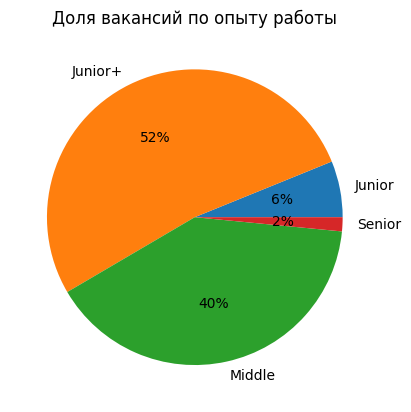

In [ ]:
# Сводная таблицца вакансий по требуемому опыту работы
vacancies_by_experience = clear_df.pivot_table(index='experience_short',
                                             values='id',
                                             aggfunc='count').reset_index()

vacancies_by_experience.columns = ['experience', 'count']

# Построение пайчарта доли вакансий по требуемому опыту
plt.pie(vacancies_by_experience['count'],
        labels=vacancies_by_experience['experience'],
        autopct='%.0f%%')
plt.title("Доля вакансий по опыту работы")
plt.show();

Больше всего требуется аналитики с опытом от 1 года до 6 лет (92% вакансий).

Самая малочисленная категория вакансий - Senior (опыт более 6 лет) и Junior (опыт до года)

### 2.8. Ключевые навыки

* key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.

In [ ]:
# Проверим уникальные значения по полю key_skills
clear_df['key_skills'].unique().tolist()

["['Power BI', 'СУБД', 'Python', 'SQL']",
 "['MS SQL', 'Работа с базами данных', 'MS Excel']",
 "['SQL', 'Power BI', 'СУБД', 'Python', 'Clickhouse', 'BPMN']",
 "['Анализ данных', 'Коммуникация', 'SQL', 'MS Office', 'Управление командой', 'Python', 'Работа с большим объемом информации', 'Навыки презентации', 'Аналитика', 'Умение принимать решения', 'Hadoop', 'Аналитические исследования', 'Pandas', 'Деловая коммуникация', 'Юнит-экономика', 'Нive']",
 "['Документация']",
 "['Python', 'SQL', 'Математическая статистика']",
 '[]',
 "['Документация', 'Проактивность', 'Коммуникация']",
 "['Аналитическое мышление']",
 "['Pandas']",
 "['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'Big Data', 'Data Scientist', 'PostgreSQL', 'Аналитическое мышление', 'MS SQL', 'DataLens', 'Аналитика', 'Статистический анализ', 'Spark', 'Английский язык', 'Python', 'Data Analysis', 'Data Mining', 'QlikView', 'Обучение и развитие']",
 "['Linux', 'SQL', 'поведение пользователей', 'Data Scientist', 'Dask', 'PostgreSQL', 

Данные не структурированы, представлены в виде списков разного размера - требуется дополнительная предобработка для анализа требуемых навыков

In [ ]:
# Преобразование столбца с навыками
clear_df['key_skills'] = clear_df['key_skills'].fillna("").apply(eval)

In [ ]:
# Подсчёт всех навыков
all_skills = [skill for sublist in clear_df['key_skills'] for skill in sublist]
skill_counts = Counter(all_skills)

# Вывод наиболее популярных навыков
most_common_skills = skill_counts.most_common()

In [ ]:
# Вывод наиболее распространенных навыков
print("Наиболее популярные навыки:")

for skill, count in most_common_skills:
      print(f"{skill}: {count}")

Наиболее популярные навыки:
Документация: 1567
SQL: 1435
confluence: 672
Аналитическое мышление: 658
BPMN: 656
Python: 626
Системный анализ: 575
UML: 574
Анализ данных: 487
Коммуникация: 461
REST: 394
Pandas: 307
Работа с базами данных: 267
SOAP: 266
Аналитика: 262
Разработка технических заданий: 253
Работа с большим объемом информации: 233
Power BI: 229
Бизнес-анализ: 227
MS Excel: 226
Постановка задач разработчикам: 216
Базы данных: 214
XML: 212
MS SQL: 211
API: 191
PostgreSQL: 180
Atlassian Jira: 159
JSON: 152
Atlassian Confluence: 138
Data Analysis: 131
Сбор и анализ информации: 128
Аналитические исследования: 123
JSON API: 119
Математическая статистика: 111
Проактивность: 105
Tableau: 92
Моделирование бизнес процессов: 91
Scrum: 85
REST API: 85
DWH: 81
Kafka: 78
Английский язык: 77
ETL: 76
Анализ бизнес показателей: 75
Оптимизация бизнес-процессов: 74
Статистический анализ: 72
Системная интеграция: 69
MS PowerPoint: 67
Техническая документация: 65
Agile: 64
Big Data: 63
A/B тесты:

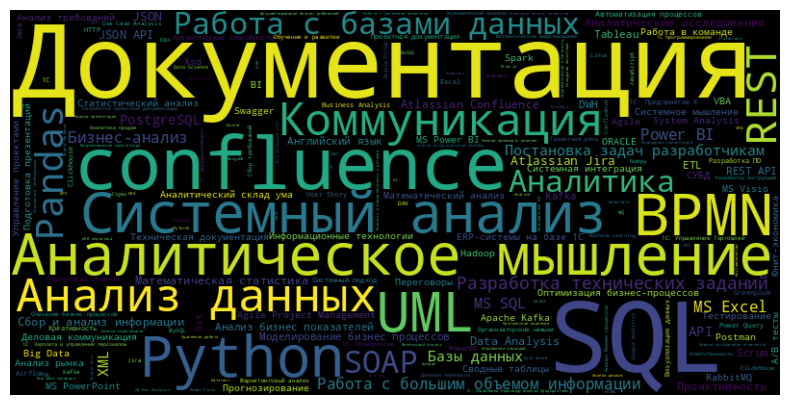

In [ ]:
# Облако слов с ключевыми навыками из вакансий
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(skill_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Из полученного облака слов хорошо видны ключевые требуемые навыки:
* Документация - 42% вакансий
* SQL: 39%
* confluence: 18%
* Аналитическое мышление: 18%
* BPMN: 18%
* Python: 17%
* Системный анализ: 15%
* UML: 15%
* Анализ данных: 13%
* Коммуникация: 12%

Таким образом среди требуемых навыков большую долю занимает документация, ее разработка и вспомогательные инструменты

### 2.9. График работы

In [ ]:
# Посмотрим уникальные значения по столбцу schedule
clear_df['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

In [ ]:
# Сводная таблицца вакансий по графику работы
vacancies_by_schedule = clear_df.pivot_table(index='schedule',
                                             values='id',
                                             aggfunc='count').reset_index()

vacancies_by_schedule.columns = ['График', 'count']

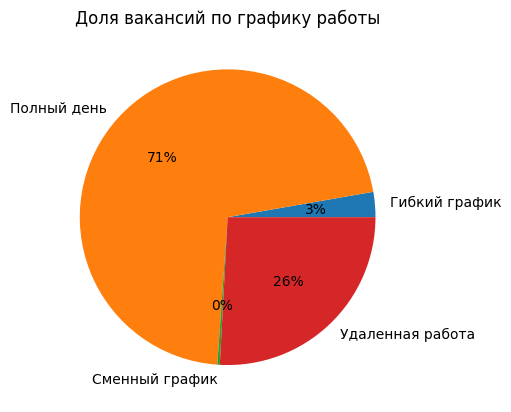

In [ ]:
# Построение пайчарта доли вакансий по графику работы
plt.pie(vacancies_by_schedule['count'],
        labels=vacancies_by_schedule['График'],
        autopct='%.0f%%')
plt.title("Доля вакансий по графику работы")
plt.show();

Большинство вакансий (71%) - на полный рабочий день, чуть больше четверти вакансий - удаленная работа.

### 2.10. Тип занятости


In [ ]:
clear_df['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

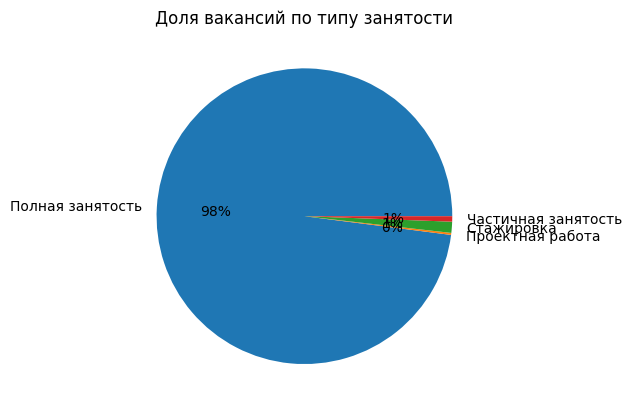

In [ ]:
# Сводная таблицца вакансий по типу занятости работы
vacancies_by_employment = clear_df.pivot_table(index='employment',
                                             values='id',
                                             aggfunc='count').reset_index()

vacancies_by_employment.columns = ['employment', 'count']

# Построение пайчарта доли вакансий по графику работы
plt.pie(vacancies_by_employment['count'],
        labels=vacancies_by_employment['employment'],
        autopct='%.0f%%')
plt.title("Доля вакансий по типу занятости")
plt.show();

Почти все вакансии рассчитаны на полную занятость аналитика (98%)

### 2.11. Зарплаты

* salary_from - Нижняя граница предлагаемой заработной платы.
* salary_to - Верхняя граница предлагаемой заработной платы.
* salary_bin - Категория зарплаты.

In [ ]:
# Посмотрим описание данных по полю salary_from, salary_to
clear_df[['salary_from', 'salary_to']].describe()

,salary_from,salary_to
count,701.000000,507.000000
mean,131570.029957,192250.138067
std,72184.265731,106554.774630
min,50.000000,20000.000000
25%,75000.000000,100000.000000
50%,120000.000000,180000.000000
75%,180000.000000,280000.000000
max,398000.000000,580000.000000


В данных обнаружилась аномалия - минимальная зарплата в поле salary_from 50 руб., похоже на ошибку в размерности.

In [ ]:
# Проверим значения менее 10000 руб.
clear_df.query('salary_from<10000')

,id,name,published_at,alternate_url,type,employer,area,experience,key_skills,schedule,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,label,dt,month,experience_short
1110,96943446,Аналитик данных в отдел развития на маркетплейсах,2024-05-11 21:45:07,https://hh.ru/vacancy/96943446,Открытая,Репетуев Иван Дмитриевич,Москва,Junior (no experince),"[Аналитическое мышление, Аналитика продаж, Ана...",Удаленная работа,...,50.0,100001.0,От 100 тысяч до 200 тысяч,"Аналитика продаж, Конкурентная аналитика, Анал...",НД,НД,DA,2024-05-11,5,Junior
1470,91944373,Системный Аналитик Middle/Senior,2024-07-06 15:14:38,https://hh.ru/vacancy/91944373,Открытая,Datanomica,Москва,Senior (6+ years),"[JSON API, JSON, XML, SQL, Юнит-экономика, con...",Удаленная работа,...,280.0,340000.0,Больше 300 тысяч,"JSON API, XML, JSON, Agile, Java, SQL, Kafka","confluence, Юнит-экономика",НД,SA,2024-07-06,7,Senior


Проблема явно в размерности данных, точечно поправим данные значения домножив на 1000

In [ ]:
clear_df.loc[1110,'salary_from'] = 50000
clear_df.loc[1470,'salary_from'] = 280000

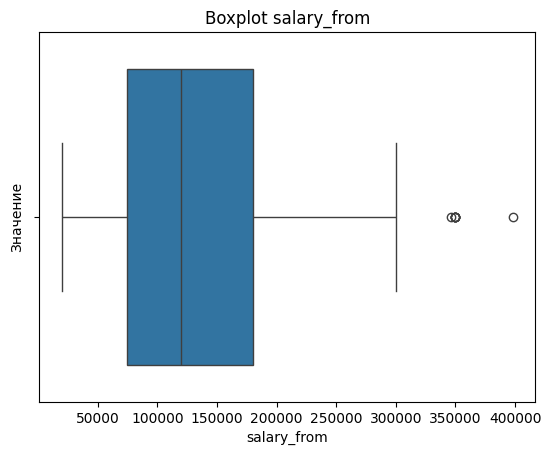

In [ ]:
# Построим boxplot по полю salary_from
sns.boxplot(x='salary_from', data=clear_df.query('~salary_from.isna()'))

# Настройки для улучшения отображения
plt.title('Boxplot salary_from')
plt.ylabel('Значение')

# Отображение графика
plt.show()

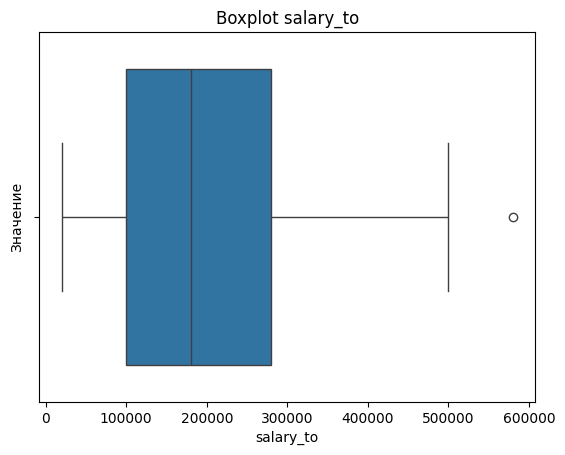

In [ ]:
# Построим boxplot по полю salary_to
sns.boxplot(x='salary_to', data=clear_df.query('~salary_to.isna()'))

# Настройки для улучшения отображения
plt.title('Boxplot salary_to')
plt.ylabel('Значение')

# Отображение графика
plt.show()

In [ ]:
# Проверим обновленные данные зарплатной вилке
clear_df[['salary_from', 'salary_to']].describe()

,salary_from,salary_to
count,703.000000,507.000000
mean,132134.083926,192250.138067
std,72304.454340,106554.774630
min,20000.000000,20000.000000
25%,75000.000000,100000.000000
50%,120000.000000,180000.000000
75%,180000.000000,280000.000000
max,398000.000000,580000.000000


* Данные по нижней границе зарплаты заполняются чаще чем верхняя граница
* Зарплата ОТ:
    * минимальная зарплата по нижней границе - 20 тыс. руб.
    * максимальная зарплата по нижней границе - 398 тыс. руб.
    * средняя зарплата по нижней границе - 132 тыс. руб.
    * медианная зарплата по нижней границе - 120 тыс. руб.
* Зарплата ДО:
    * минимальная зарплата по верхней границе - 20 тыс. руб.
    * максимальная зарплата по верхней границе - 580 тыс. руб.
    * средняя зарплата по верхней границе - 192 тыс. руб.
    * медианная зарплата по верхней границе - 180 тыс. руб.

In [ ]:
# Проверим уникальные значения по столбцу salary_bin
clear_df['salary_bin'].unique()

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч',
       'От 200 тысяч до 300 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч'], dtype=object)

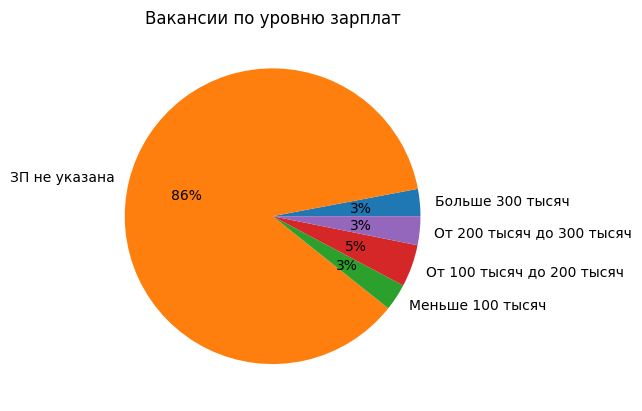

In [ ]:
# Сводная таблицца вакансий по уровню зарплат
salary_bin = clear_df.pivot_table(index='salary_bin',
                                             values='id',
                                             aggfunc='count').reset_index()

salary_bin.columns = ['salary_bin', 'count']

# Построение пайчарта доли вакансий по графику работы
plt.pie(salary_bin['count'],
        labels=salary_bin['salary_bin'],
        autopct='%.0f%%')
plt.title("Вакансии по уровню зарплат")
plt.show();

Для 86% вакансий уровень зарплат не указан

### 2.12. Hard skills

In [ ]:
# проверим уникальные значения в столбце hard_skills_from_description
clear_df['hard_skills_from_description'].unique()

array(['НД', 'Pandas, Юнит-экономика', 'Pandas', 'confluence',
       'Pandas, confluence', 'Юнит-экономика', 'Google Sheets',
       'Pandas, Google Sheets', 'Математическая статистика',
       'confluence, Юнит-экономика'], dtype=object)

Данные унифицированы и удобны для дальнейшего анализа

In [ ]:
# Сделаем срез по вакансиям с заполненными hard skils
hs = clear_df.query('hard_skills_from_description!="НД"')

In [ ]:
# Сделаем сводную таблицу по hard-skils
hard_skils = hs.pivot_table(index='hard_skills_from_description',
                            values='id',
                            aggfunc='count').reset_index()
hard_skils.columns = ['hard_skil', 'quantity']

# Добавим столбец с долей каждого hard skil в требованиях к вакансиям
hard_skils['hard_skil_share'] = hard_skils['quantity'] / hs.shape[0] * 100
hard_skils

,hard_skil,quantity,hard_skil_share
0,Google Sheets,2,0.203046
1,Pandas,266,27.005076
2,"Pandas, Google Sheets",1,0.101523
3,"Pandas, confluence",30,3.045685
4,"Pandas, Юнит-экономика",4,0.406091
5,confluence,633,64.263959
6,"confluence, Юнит-экономика",9,0.913706
7,Математическая статистика,1,0.101523
8,Юнит-экономика,39,3.959391


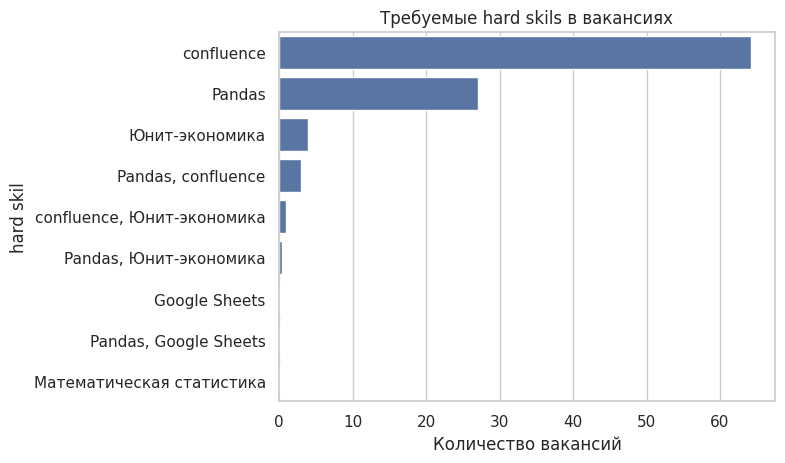

In [ ]:
# Визуализируем полученную информацию

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='hard_skil_share',
                 y='hard_skil',
                 data=hard_skils.sort_values(by='hard_skil_share', ascending=False))
plt.title('Требуемые hard skils в вакансиях')
plt.xlabel('Количество вакансий')
plt.ylabel('hard skil');

* Cреди требуемых hard skils с большим отрывом лидирует confluence - сервис для разработки документации (более 60% вакансий)
* На втором месте Pandas (чуть менее 30% вакансий)
* На третьем месте - юнит-экономика с долей около 4%.
Далее следуют различные связки hard-skils (pandas+confluence, confluence+юнит-экономика, google sheets и т.д.) - доля вакансий с такими требованиями не преышает 4%

Знание Confluence и Pandas - важные hard skils в работе аналитика

### 2.13. Soft skills

In [ ]:
# Проверим уникальные значения по столбцу soft_skills_from_description
clear_df['soft_skills_from_description'].unique()

array(['НД', 'Коммуникация', 'Документация',
       'Коммуникация, Документация, Проактивность',
       'Аналитическое мышление', 'Проактивность',
       'Креативность, Аналитическое мышление',
       'Коммуникация, Документация',
       'Проактивность, Аналитическое мышление',
       'Документация, Аналитическое мышление', 'Адаптивность',
       'Коммуникация, Решение проблем, Презентация результатов, Внимание к деталям',
       'Коммуникация, Проактивность',
       'Коммуникация, Решение проблем, Критическое мышление, Внимание к деталям',
       'Эмпатия', 'Креативность', 'Коммуникация, Переговоры',
       'Документация, Переговоры',
       'Документация, Проактивность, Креативность',
       'Коммуникация, Аналитическое мышление', 'Решение проблем',
       'Решение проблем, Принятие решений',
       'Коммуникация, Документация, Переговоры', 'Переговоры',
       'Коммуникация, Адаптивность',
       'Коммуникация, Документация, Презентация результатов',
       'Коммуникация, Переговоры

Данные представлены перечислением soft skils в произвольном порядке, в таком виде данные не пригодны для анализа.

In [ ]:
# Сделаем срез по вакансиям с указанными soft skills
ss = clear_df.query('soft_skills_from_description!="НД"')

In [ ]:
# Преобразуем колонку в строковом представлении
skills_series = ss['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills = [skill for sublist in skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
skills_count = pd.Series(all_skills).value_counts()

In [ ]:
skills_count

,count
Документация,1567
Коммуникация,461
Аналитическое мышление,294
Проактивность,104
Переговоры,54
Креативность,23
Адаптивность,6
Решение проблем,6
Принятие решений,5
Тайм-менеджмент,5


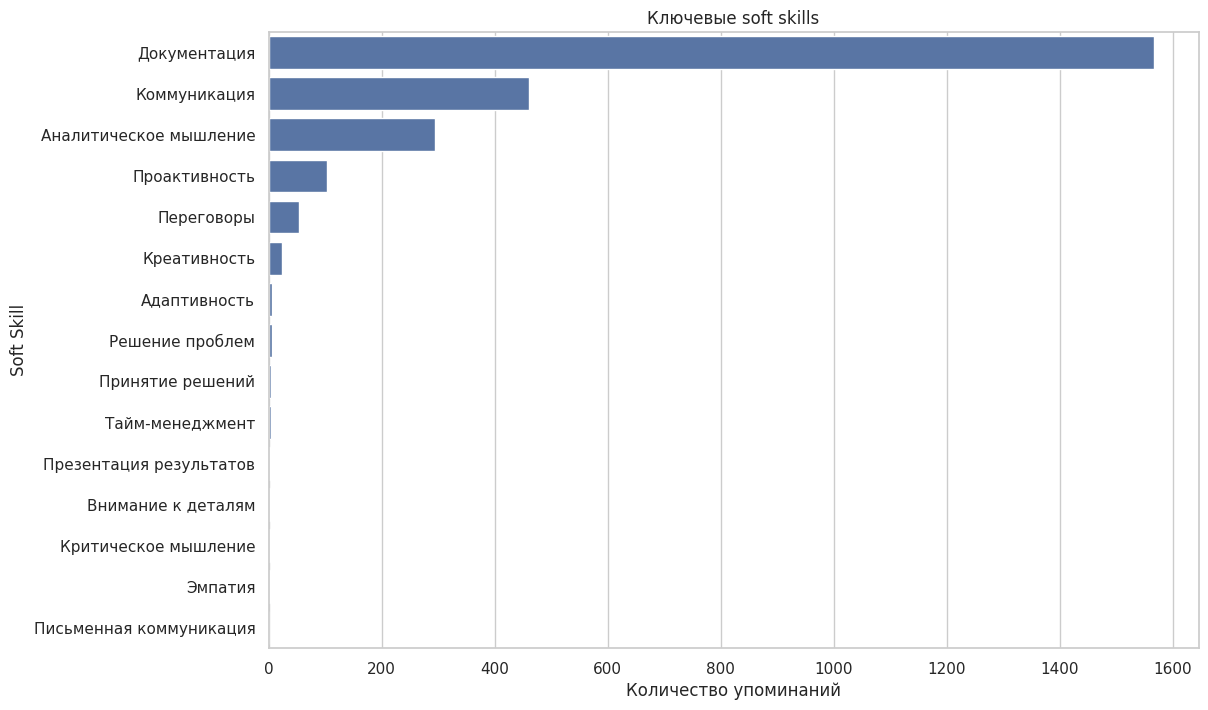

In [ ]:
 # Построим bar plot с ключевыми soft skills
plt.figure(figsize=(12, 8))
sns.barplot(x=skills_count.values, y=skills_count.index, orient='h')

plt.title('Ключевые soft skills')
plt.xlabel('Количество упоминаний')
plt.ylabel('Soft Skill')

# Отображение графика
plt.show();

Таким образом ТОП-5 ключевых soft skills для аналитика это:
* Документация (пересекается с confluence)
* Коммуникация
* Аналитическое мышление
* Проактивность
* Переговоры

Суммируя - для аналитика крайне важно уметь работать с документацией, инструментами для ее разработки, а также уметь коммуницировать с коллегами

### 2.14. Выводы по исследовательскому анализу данных

* В датасете представлены данные за период с 13 февраля по 9 июля 2024 года, в т.ч.:
    * Аналитики данных - данные с февраля по июнь
    * Системные аналитик - данные за июнь-июль (менее полумесяца)

* Сравнивать данные по периодам смысла нет, так как датасеты сформированы за разные периоды, при этом данные по вакансиям системных аналитиков представлены периодом менее 15 дней.

* Все вакансии на момент подготовки выгрузки имели статус "Открытая"

* В рассматриваемом датасете 1358 уникальных работодателей
* ТОП-5 частых работодателей в датасете:
    * СБЕР - 338 ваувнсий
    * T1 - 106 вакансий
    * Aston - 66 вакансий
    * WILDBERRIES - 51 вакансия
    * ПСБ (ПАО «Промсвязьбанк») - 40 вакансий

* Вакансии представлены для 106 городов.
* Наибольшая доля вакансий приходится на Москву - 2 379 (64% от всех вакансий)
* За Москвой следуют:
    * Санкт-Петербург - 403 (11%)
    * Екатеринбург - 111 (3%)
    * Новосибирск и Казань - 82 / 80 вакансий соответственно (2%)

* Больше всего требуется аналитики с опытом от 1 года до 6 лет (92% вакансий).
* Самая малочисленная категория вакансий - Senior (опыт более 6 лет) и Junior (опыт до года)

Ключевые требуемые навыки (по встречаемости в вакансиях):
* Документация - 42% вакансий
* SQL: 39%
* confluence: 18% - приложение для написания документации
* Аналитическое мышление: 18%
* BPMN: 18% - нотация для схем бизнес-процессов
* Python: 17%
* Системный анализ: 15%
* UML: 15% - унифицированный язык моделирования
* Анализ данных: 13%
* Коммуникация: 12%

Таким образом среди требуемых навыков большую долю занимает документация, ее разработка и вспомогательные инструменты

* Большинство вакансий (71%) - на полный рабочий день, чуть больше четверти вакансий - удаленная работа.

* 98% вакансиq рассчитаны на полную занятость аналитика.


* Для 86% вакансий уровень зарплат не указан
* Данные по нижней границе зарплаты заполняются чаще чем верхняя граница
* Зарплата ОТ:
    * минимальная зарплата по нижней границе - 20 тыс. руб.
    * максимальная зарплата по нижней границе - 398 тыс. руб.
    * средняя зарплата по нижней границе - 132 тыс. руб.
    * медианная зарплата по нижней границе - 120 тыс. руб.
* Зарплата ДО:
    * минимальная зарплата по верхней границе - 20 тыс. руб.
    * максимальная зарплата по верхней границе - 580 тыс. руб.
    * средняя зарплата по верхней границе - 192 тыс. руб.
    * медианная зарплата по верхней границе - 180 тыс. руб.

* Cреди требуемых hard skils с большим отрывом лидирует confluence - сервис для разработки документации (более 60% вакансий)
* На втором месте Pandas (чуть менее 30% вакансий)
* На третьем месте - юнит-экономика с долей около 4%.
Далее следуют различные связки hard-skils (pandas+confluence, confluence+юнит-экономика, google sheets и т.д.) - доля вакансий с такими требованиями не преышает 4%

Знание Confluence и Pandas - важные hard skils в работе аналитика

ТОП-5 ключевых soft skills для аналитика это:
* Документация (пересекается с confluence)
* Коммуникация
* Аналитическое мышление
* Проактивность
* Переговоры

Суммируя - для аналитика крайне важно уметь работать с документацией, инструментами для ее разработки, а также уметь коммуницировать с коллегами


## 3. Грейды требуемых специалистов

Необходимо определить доли грейдов среди вакансий Аналитик данных и Системный аналитик

Ранее в ходе EDA выяснили, что 56% вакансий рассчитаны на грейд Junior+ и 40% на Middle. Посмотрим как это соотношение меняется в зависимости от профессии.

In [ ]:
# Сделаем сводную таблицу по грейдам и профессиям
grade_pivot = clear_df.pivot_table(index='experience',
                                   columns='label',
                                   values='id',
                                   aggfunc='count').reset_index()

grade_pivot.columns = ['label', 'DA_num', 'SA_num']
grade_pivot

,label,DA_num,SA_num
0,Junior (no experince),142,86
1,Junior+ (1-3 years),1091,850
2,Middle (3-6 years),555,930
3,Senior (6+ years),13,44


In [ ]:
#Посчитаем долю грейдов для каждой профессии
grade_pivot['da_share'] = round(grade_pivot['DA_num'] / grade_pivot['DA_num'].sum()*100)
grade_pivot['sa_share'] = round(grade_pivot['SA_num'] / grade_pivot['SA_num'].sum()*100)
grade_pivot

,label,DA_num,SA_num,da_share,sa_share
0,Junior (no experince),142,86,8.0,5.0
1,Junior+ (1-3 years),1091,850,61.0,45.0
2,Middle (3-6 years),555,930,31.0,49.0
3,Senior (6+ years),13,44,1.0,2.0


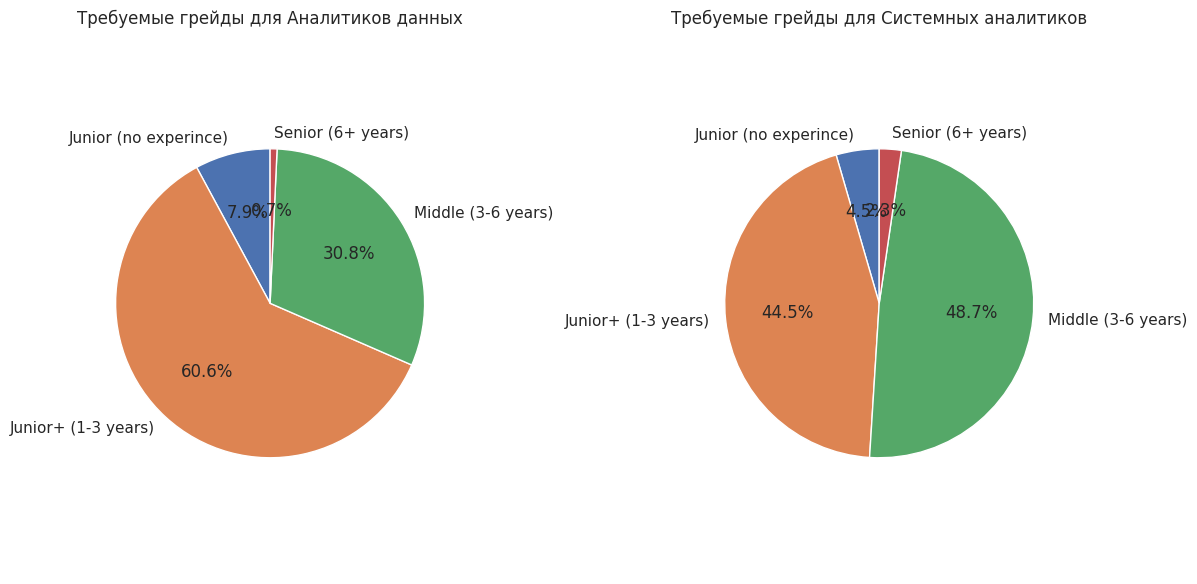

In [ ]:
# Построим пайчарты под полученные данные
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Аналитики данных
axes[0].pie(grade_pivot['DA_num'], labels=grade_pivot['label'], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')

# Системные аналитики
axes[1].pie(grade_pivot['SA_num'], labels=grade_pivot['label'], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')

axes[0].set_title('Требуемые грейды для Аналитиков данных')
axes[1].set_title('Требуемые грейды для Системных аналитиков')


plt.tight_layout()
plt.show()

### 3.1. Выводы по исследованию требуемых грейдов в вакансиях

Между вакансиями Аналитиков данных и Системных аналитиков обнаружена значительная разница в требованиях к опыту.

Так среди вакансий аналитиков данных 61% - Junior+ (опыт от года до трех лет), для системных аналитиков - 45%.

В вакансиях системных аналитиков требуется больше мидлов (опыт от 3 до 6 лет) - 49%, среди аналитиков данных таких вакансий - 31%

В вакансиях по обоим профессиям меньше всего требуется Junior (опыт до года) и Senior (опыт свыше 6 лет.)

Таким образом порог входа в профессию аналитика ниже у аналитиков данных - в вакансиях чаще встречаются предложения для Junior (8% против 5 для системных аналитиков), также значительно выше спрос на Junior+ (опыт от года)

Также можно предположить что низкий спрос на Senior связан с тем, что компании берут специалистов с минимально достаточным для работы уровнем и растят их внутри компании и очень редко привлекают с рынка Senior'ов.

## 4. Типичное место работы аналитика

### 4.1. Типичное место работы аналитика данных

In [ ]:
# Сделаем срез по аналитикам данных
da = clear_df.query('label=="DA"')

#### 4.1.1. ТОП работодателей

In [ ]:
# Сделаем свод по работодателям и грейдам
da_companies = da.pivot_table(index='employer',
                                   columns='experience_short',
                                   values='id',
                                   aggfunc='count').reset_index()

da_companies.columns = ['employer', 'Junior', 'Junior+', 'Middle', 'Senior']

# Заполним пропуски нулями
da_companies = da_companies.fillna(0)

# Добавим столбец с общим количеством открытых вакансий у компании
da_companies['total_vacancies'] =da_companies['Junior'] + da_companies['Junior+'] + da_companies['Middle'] + da_companies['Senior']

# Отсортируем компании по убыванию количества вакансий и оставим ТОП 15
da_companies = da_companies.sort_values(by='total_vacancies', ascending=False).head(15)

da_companies

,employer,Junior,Junior+,Middle,Senior,total_vacancies
534,СБЕР,13.0,159.0,71.0,0.0,243.0
193,WILDBERRIES,1.0,16.0,26.0,0.0,43.0
132,Ozon,2.0,17.0,15.0,0.0,34.0
255,Банк ВТБ (ПАО),1.0,24.0,3.0,0.0,28.0
594,Т1,0.0,5.0,21.0,0.0,26.0
409,"МАГНИТ, Розничная сеть",7.0,15.0,2.0,0.0,24.0
413,МТС,1.0,15.0,6.0,0.0,22.0
129,Okko,0.0,12.0,7.0,0.0,19.0
660,Центральный банк Российской Федерации,2.0,12.0,2.0,0.0,16.0
497,Правительство Москвы,2.0,11.0,2.0,0.0,15.0


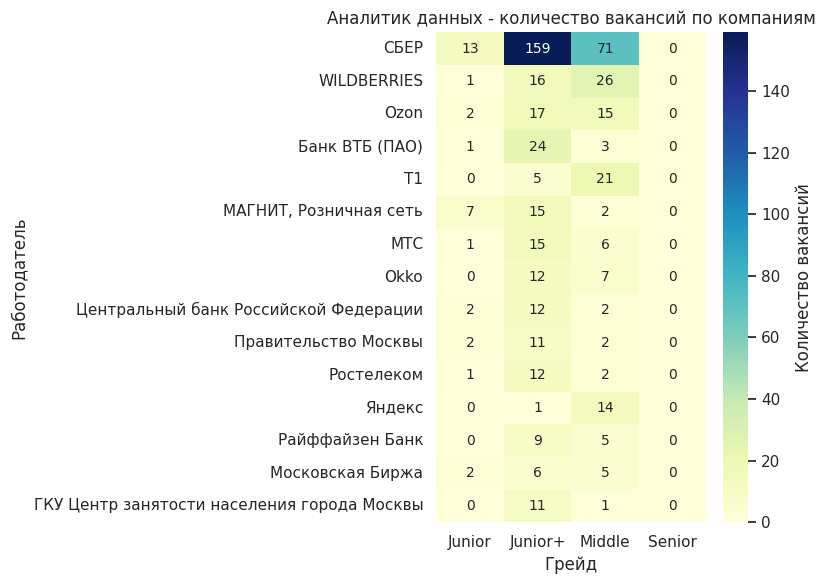

In [ ]:
# Визуализируем полученные данные с помощью хитмэпа

# Удалим столбец с общим количеством вакансий
heatmap_da_companies = da_companies.drop(columns=['total_vacancies']).set_index('employer')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_da_companies,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            cbar_kws={'label': 'Количество вакансий'},
            annot_kws={"size": 10})

# Настройка заголовка и меток осей
plt.title('Аналитик данных - количество вакансий по компаниям')
plt.xlabel('Грейд')
plt.ylabel('Работодатель')

# Отображение графика
plt.tight_layout()
plt.show()

Из полученных данных видно:
* Больше всего аналитики данных требуются в СБЕРе, WILDBERRIES, и ОЗОН. При этом количество вакансий аналитиков у СБЕРа отличается на порядок по сравнению с другими компаниями.
* Если посмотреть на сферу деятельности компаний, то больше всего аналитики данных востребованы в финансовом секторе и маркетплейсах
* В разрезе грейдов - самые востребованный Junior+ и Middle. Больше всего Junior+ требуется в СБЕР (159 вакансий), также как и Middle (71 вакансия)
* Т1 и Яндекс чаще ищут более опытных аналитиков уровня Middle.
* У маркетплейсов OZON и WILDBERRIES соотношение вакансий Junior+/Middle примерно сопоставимо.

Вероятность попасть на работу в СБЕР выше с учетом количества открытых вакансий и относительно низкого входного порога по требуемому опыту.

#### 4.1.2. Зарплата

In [ ]:
# Описательная статистика по зарплатам ОТ в разрезе грейдов для вакансий аналитиков данных
da_salary_from = da.pivot_table(index='experience_short',
               values='salary_from',
               aggfunc=['min','max','mean','median']
               ).reset_index()

da_salary_from.columns = ['grade','min_salary_from','max_salary_from','mean_salary_from','median_salary_from']

da_salary_from

,grade,min_salary_from,max_salary_from,mean_salary_from,median_salary_from
0,Junior,25000.0,140000.0,65593.660714,60000.0
1,Junior+,28940.0,300000.0,98010.467290,90000.0
2,Middle,40000.0,398000.0,175357.828947,155000.0
3,Senior,70000.0,200000.0,156666.666667,200000.0


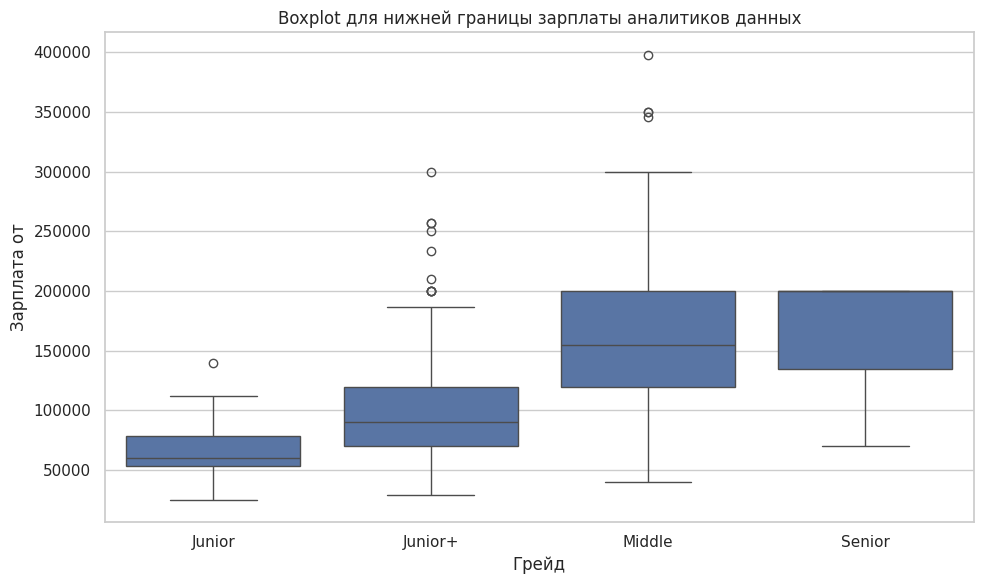

In [ ]:
# Построение боксплота
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_short', y='salary_from', data=da)

plt.title('Boxplot для нижней границы зарплаты аналитиков данных')
plt.xlabel('Грейд')
plt.ylabel('Зарплата от')

plt.tight_layout()
plt.show()

На полученном бокплоте хорошо видно изменение диапозонов нижней границы зарплатных предложений для вакансий аналитиков данных - чем выше выше грейд - тем выше минимально предлагаемая зарплата.

Так медианное предложение по нижней границе растет в зависимости от грейда:
* Junior - 60 тыс. руб.
* Junior+ - 90 тыс. руб.
* Middle - 155 тыс. руб.
* Senior - 200 тыс. руб.

In [ ]:
# Описательная статистика по зарплатам ДО в разрезе грейдов для вакансий аналитиков данных
da_salary_to = da.pivot_table(index='experience_short',
               values='salary_to',
               aggfunc=['min','max','mean','median']
               ).reset_index()

da_salary_to.columns = ['grade','min_salary_to','max_salary_to','mean_salary_to','median_salary_to']

da_salary_to

,grade,min_salary_to,max_salary_to,mean_salary_to,median_salary_to
0,Junior,25000.0,142000.0,73330.764706,80000.0
1,Junior+,35000.0,300000.0,129879.465649,120000.0
2,Middle,55000.0,497500.0,247370.409836,234000.0
3,Senior,200000.0,280000.0,240000.000000,240000.0


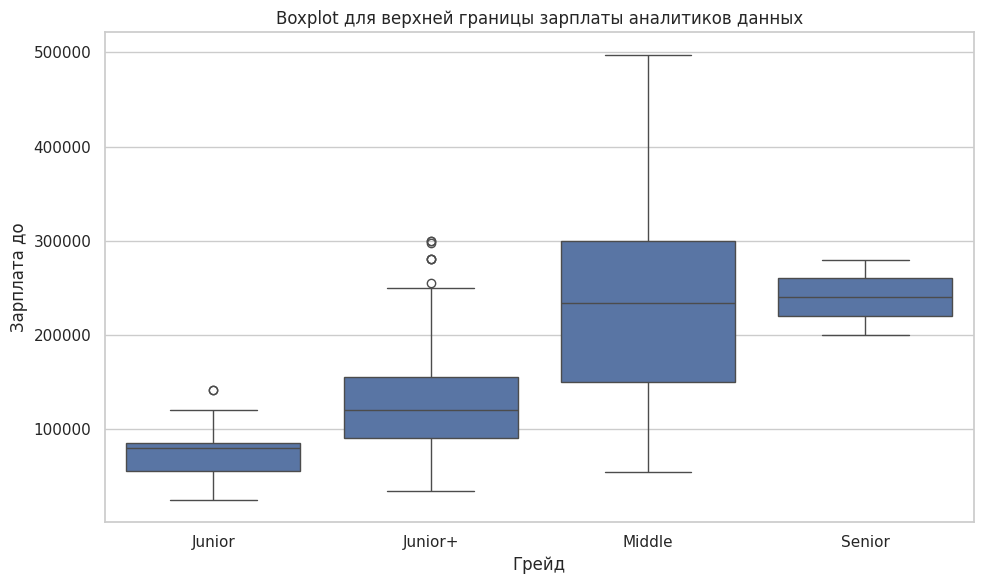

In [ ]:
# Построение боксплота
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_short', y='salary_to', data=da)

plt.title('Boxplot для верхней границы зарплаты аналитиков данных')
plt.xlabel('Грейд')
plt.ylabel('Зарплата до')

plt.tight_layout()
plt.show()

Картина по максимальному зарплатному предложению для аналитиков данных в зависимости о грейда похожа на картину с минимальным предложением. Также видно что разброс максимальной зарплаты для Sinior очень маленький, и зарплаты Middle могут превышть зарплаты Senior, это может быть связано с тем, что для Senior реже указывают верхний потолок.

Также видно что на некоторых вакансиях для Junior+ и Middle максимальное зарплатное предложением выше чем для грейда Senior. Возможно это связано с тем, что наибольший спрос как раз приходится на грейды Junior+ и Middle.

Медиана верхнего зарплатного предложения для аналитиков данных выглядит так:
* Junior - 80 тыс. руб.
* Junior+ - 120 тыс. руб.
* Middle - 234 тыс. руб.
* Senior - 240 тыс. руб.

In [ ]:
# Сделаем свод по полю salary_bin для вакансий аналитиков данных
da_salary_bin = da.pivot_table(index='salary_bin',
                               columns='experience_short',
                               values='id',
                               aggfunc='count').reset_index()

da_salary_bin = da_salary_bin.fillna(0)

da_salary_bin.columns = ['salary_bin','Junior','Junior+','Middle','Senior']
da_salary_bin

,salary_bin,Junior,Junior+,Middle,Senior
0,Больше 300 тысяч,0.0,2.0,26.0,0.0
1,ЗП не указана,108.0,960.0,494.0,11.0
2,Меньше 100 тысяч,29.0,35.0,4.0,0.0
3,От 100 тысяч до 200 тысяч,5.0,73.0,18.0,0.0
4,От 200 тысяч до 300 тысяч,0.0,21.0,13.0,2.0


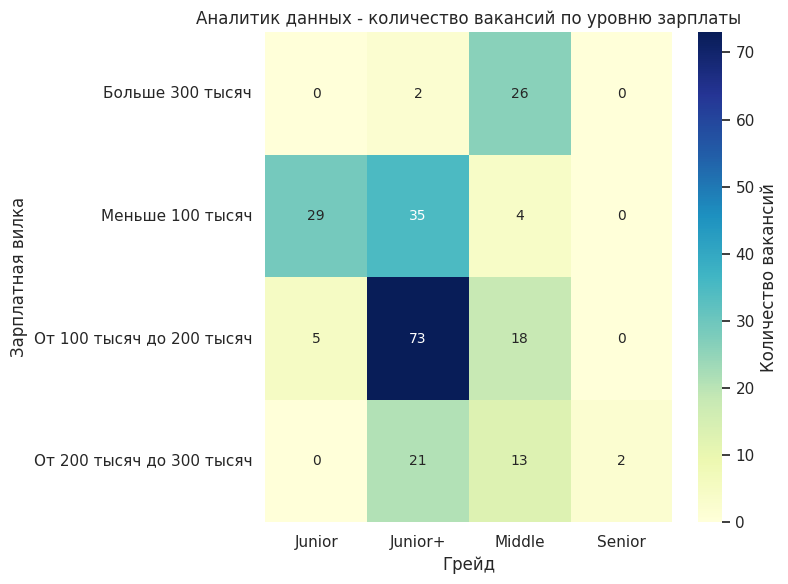

In [ ]:
# Визуализируем полученные данные с помощью хитмэпа

salary_bin_heatmap = da_salary_bin.query('salary_bin!="ЗП не указана"').set_index('salary_bin')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(salary_bin_heatmap,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            cbar_kws={'label': 'Количество вакансий'},
            annot_kws={"size": 10})

plt.title('Аналитик данных - количество вакансий по уровню зарплаты')
plt.xlabel('Грейд')
plt.ylabel('Зарплатная вилка')

plt.tight_layout()
plt.show()

Из полученной тепловой карты видно, что:
* Для Junior больше всего вакансий с зарплатой в категории "Менее 100 тысяч"
* Для Junior+ - категория от 100 до 200 тыс - самая частая
* Для Middle - самая частая категория - больше 300 тыс., сопостовимы по количеству также категории 100-200 тыс, и 200-300 тыс. Самая малочисленная категория - меньшн 100 тыс.
* Для Senior - практически нет указаний к какой категории зарплатной вилки относится вакансия.

**Выводы по зарплатам аналитиков данных**

Типичная зарплата аналитика данных по грейдам:
* Junior: 60-80 тыс. руб.
* Junior+: 90-120 тыс. руб.
* Middle: 155-234 тыс. руб.
* Senior: 200-240 тыс. руб.

#### 4.1.3. Тип занятости

In [ ]:
# Сделаем сводную таблицу по типам занятости аналитиков данных в разрезе грейдов
da_employment = da.pivot_table(index='employment',
                               columns='experience_short',
                               values='id',
                               aggfunc='count').reset_index()

da_employment = da_employment.fillna(0)

da_employment.columns = ['employment','Junior','Junior+','Middle','Senior']

da_employment.set_index('employment', inplace=True)

da_employment


,Junior,Junior+,Middle,Senior
employment,,,,
Полная занятость,123.0,1079.0,549.0,13.0
Проектная работа,1.0,3.0,1.0,0.0
Стажировка,15.0,1.0,0.0,0.0
Частичная занятость,3.0,8.0,5.0,0.0


<Figure size 800x800 with 0 Axes>

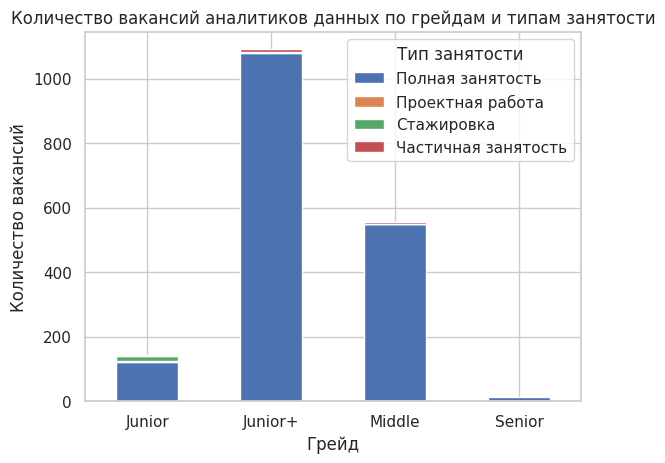

In [ ]:
# Визуализируем полученные данные при помощи stacked bar plot
plt.figure(figsize=(8, 8))
da_employment.T.plot(kind='bar', stacked=True)

plt.title('Количество вакансий аналитиков данных по грейдам и типам занятости')
plt.xlabel('Грейд')
plt.ylabel('Количество вакансий')
plt.legend(title='Тип занятости')
plt.xticks(rotation=0)
plt.show();

**Выводы по типу занятости аналитиков данных**



Практически все вакансии аналитиков данных для всех грейдов предполагают полную занятость. Для Junior встречаются вакансии на стажировку.

#### 4.1.4. График работы

In [ ]:
# Сделаем сводную таблицу по графикам работы в разрезе грейдов
da_schedule = da.pivot_table(index='schedule',
                               columns='experience_short',
                               values='id',
                               aggfunc='count').reset_index()

da_schedule = da_schedule.fillna(0)

da_schedule.columns = ['schedule','Junior','Junior+','Middle','Senior']

da_schedule.set_index('schedule', inplace=True)

da_schedule

,Junior,Junior+,Middle,Senior
schedule,,,,
Гибкий график,3.0,21.0,17.0,0.0
Полный день,122.0,905.0,406.0,8.0
Сменный график,2.0,7.0,0.0,0.0
Удаленная работа,15.0,158.0,132.0,5.0


<Figure size 800x800 with 0 Axes>

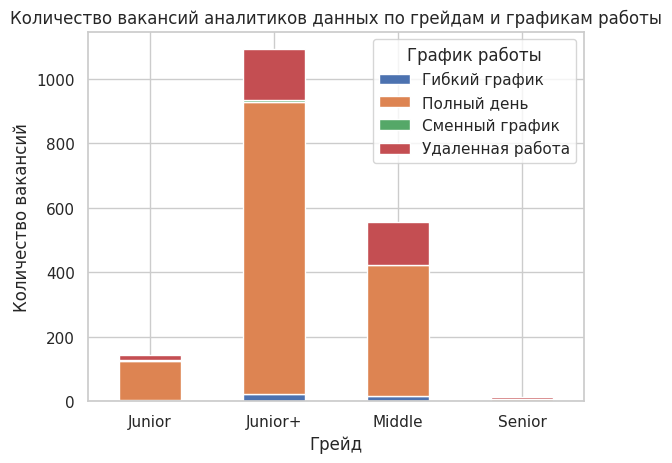

In [ ]:
# Визуализируем полученные данные при помощи stacked bar plot
plt.figure(figsize=(8, 8))
da_schedule.T.plot(kind='bar', stacked=True)

plt.title('Количество вакансий аналитиков данных по грейдам и графикам работы')
plt.xlabel('Грейд')
plt.ylabel('Количество вакансий')
plt.legend(title='График работы')
plt.xticks(rotation=0)
plt.show();

**Выводы по графику работы аналитиков данных**
В основном большинство вакансий предполагают полный рабочий день, при этом в зависимости от грейда есть возможность удаленной работы:
* Junior - 11%
* Junior+ - 14%
* Middle - 24%
* Senior - 38%

То есть, чем выше грейд - тем выше возможность работать удаленно.

#### 4.1.5. Выводы по типичному месту работы аналитика данных

* Больше всего аналитики данных требуются в СБЕРе, WILDBERRIES, и ОЗОН. При этом количество вакансий аналитиков у СБЕРа отличается на порядок по сравнению с другими компаниями.
* Если посмотреть на сферу деятельности компаний, то больше всего аналитики данных востребованы в финансовом секторе и маркетплейсах
* В разрезе грейдов - самые востребованный Junior+ и Middle. Больше всего Junior+ требуется в СБЕР (159 вакансий), также как и Middle (71 вакансия)
* Т1 и Яндекс чаще ищут более опытных аналитиков уровня Middle.
* У маркетплейсов OZON и WILDBERRIES соотношение вакансий Junior+/Middle примерно сопоставимо.

Вероятность попасть на работу в СБЕР выше с учетом количества открытых вакансий и относительно низкого входного порога по требуемому опыту.


Типичная зарплата аналитика данных по грейдам:
* Junior: 60-80 тыс. руб.
* Junior+: 90-120 тыс. руб.
* Middle: 155-234 тыс. руб.
* Senior: 200-240 тыс. руб.

Практически все вакансии аналитиков данных для всех грейдов предполагают полную занятость. Для Junior встречаются вакансии на стажировку.

В основном большинство вакансий предполагают полный рабочий день, при этом в зависимости от грейда есть возможность удаленной работы:
* Junior - 11%
* Junior+ - 14%
* Middle - 24%
* Senior - 38%

То есть, чем выше грейд - тем выше возможность работать удаленно.

<a id="sa_typical_workplace"></a>
### 4.2. Типичное место работы системного аналитика

In [ ]:
# Сделаем срез по системным аналитикам
sa = clear_df.query('label=="SA"')

#### 4.2.1. ТОП работодателей

In [ ]:
# Сделаем свод по работодателям и грейдам
sa_companies = sa.pivot_table(index='employer',
                                   columns='experience_short',
                                   values='id',
                                   aggfunc='count').reset_index()

sa_companies.columns = ['employer', 'Junior', 'Junior+', 'Middle', 'Senior']

# Заполним пропуски нулями
sa_companies = sa_companies.fillna(0)

# Добавим столбец с общим количеством открытых вакансий у компании
sa_companies['total_vacancies'] = sa_companies['Junior'] + sa_companies['Junior+'] + sa_companies['Middle'] + sa_companies['Senior']

# Отсортируем компании по убыванию количества вакансий и оставим ТОП 15
sa_companies = sa_companies.sort_values(by='total_vacancies', ascending=False).head(15)

sa_companies

,employer,Junior,Junior+,Middle,Senior,total_vacancies
665,СБЕР,2.0,42.0,51.0,0.0,95.0
728,Т1,3.0,17.0,57.0,3.0,80.0
26,Aston,16.0,25.0,23.0,1.0,65.0
700,Совкомбанк Технологии,0.0,22.0,15.0,0.0,37.0
596,ПСБ (ПАО «Промсвязьбанк»),0.0,9.0,21.0,0.0,30.0
188,Selecty,0.0,13.0,8.0,1.0,22.0
727,Т-Банк,0.0,3.0,19.0,0.0,22.0
662,Ростелеком Информационные Технологии,0.0,10.0,8.0,0.0,18.0
835,билайн,0.0,4.0,14.0,0.0,18.0
482,"Красное & Белое, розничная сеть",0.0,16.0,0.0,0.0,16.0


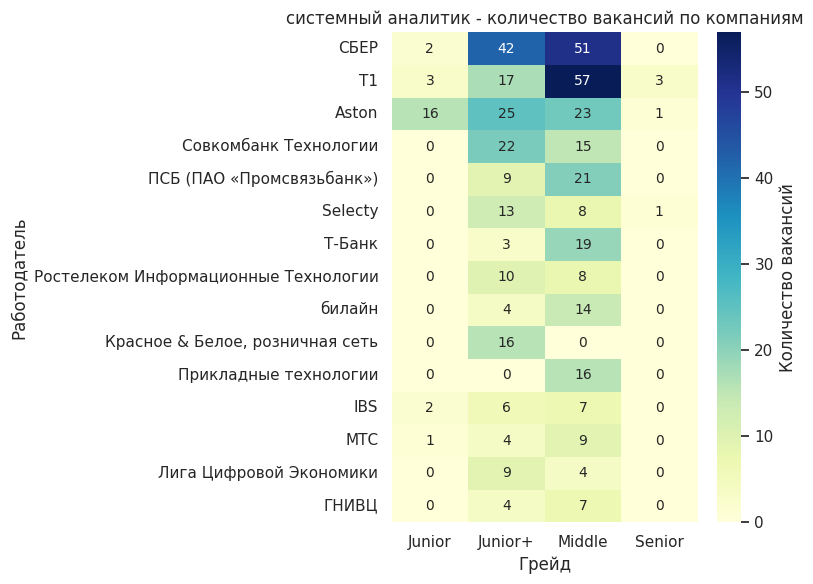

In [ ]:
# Визуализируем полученные данные с помощью хитмэпа

# Удалим столбец с общим количеством вакансий
heatmap_sa_companies = sa_companies.drop(columns=['total_vacancies']).set_index('employer')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_sa_companies,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            cbar_kws={'label': 'Количество вакансий'},
            annot_kws={"size": 10})

# Настройка заголовка и меток осей
plt.title('системный аналитик - количество вакансий по компаниям')
plt.xlabel('Грейд')
plt.ylabel('Работодатель')

# Отображение графика
plt.tight_layout()
plt.show()

Из полученных данных видно:
* Больше всего системных аналитиков требуются в СБЕРе, Т1 (многопрофильный ИТ холдинг), и Aston. Количество вакансий системных аналитиков в ТОП компаний меньше чем вакансий аналитиков данных.
* Если посмотреть на сферу деятельности компаний, то больше всего системные аналитики востребованы в финансовом секторе, многопрофильных ИТ компаниях, консалтинге, телекоме
* В разрезе грейдов - самые востребованный Junior+ и Middle. Вакансий для Junior - значительно меньше по сравнению с вакансиями аналитиков данных. То есть к системным аналитикам предьъявляются более высокие требования к опыту работы.

Входной порогог для системного аналитика выше чем для аналитика данных, в вакансиях предъявляются большие требования по опыту работы.

#### 4.2.2. Зарплата

In [ ]:
# Описательная статистика по зарплатам ОТ в разрезе грейдов для вакансий системных аналитиков
sa_salary_from = sa.pivot_table(index='experience_short',
               values='salary_from',
               aggfunc=['min','max','mean','median']
               ).reset_index()

sa_salary_from.columns = ['grade','min_salary_from','max_salary_from','mean_salary_from','median_salary_from']

sa_salary_from

,grade,min_salary_from,max_salary_from,mean_salary_from,median_salary_from
0,Junior,20000.0,300000.0,65161.363636,70000.0
1,Junior+,40000.0,350000.0,131703.351190,120000.0
2,Middle,50000.0,350000.0,205355.774436,200000.0
3,Senior,100000.0,350000.0,237777.777778,200000.0


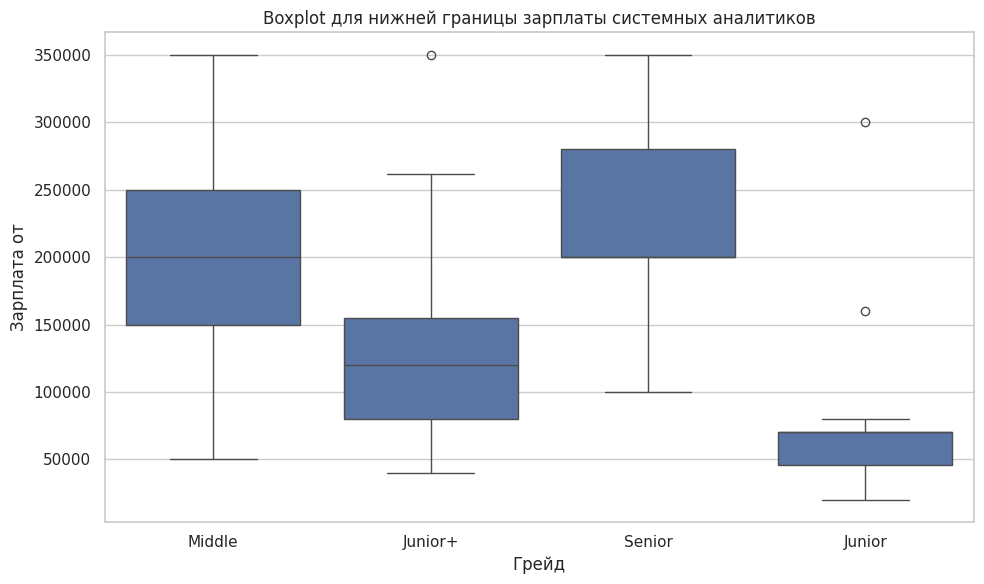

In [ ]:
# Построение боксплота
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_short', y='salary_from', data=sa)

plt.title('Boxplot для нижней границы зарплаты системных аналитиков')
plt.xlabel('Грейд')
plt.ylabel('Зарплата от')

plt.tight_layout()
plt.show()

Медианное предложение по нижней границе растет в зависимости от грейда системного аналитика:
* Junior - 70 тыс. руб.
* Junior+ - 120 тыс. руб.
* Middle - 200 тыс. руб.
* Senior - 200 тыс. руб.

In [ ]:
# Описательная статистика по зарплатам ДО в разрезе грейдов для вакансий системных аналитиков
sa_salary_to = sa.pivot_table(index='experience_short',
               values='salary_to',
               aggfunc=['min','max','mean','median']
               ).reset_index()

sa_salary_to.columns = ['grade','min_salary_to','max_salary_to','mean_salary_to','median_salary_to']

sa_salary_to

,grade,min_salary_to,max_salary_to,mean_salary_to,median_salary_to
0,Junior,20000.0,418000.0,97073.684211,80000.0
1,Junior+,43000.0,580000.0,183604.607843,172000.0
2,Middle,120000.0,500000.0,283615.901515,295000.0
3,Senior,290000.0,450000.0,362857.142857,340000.0


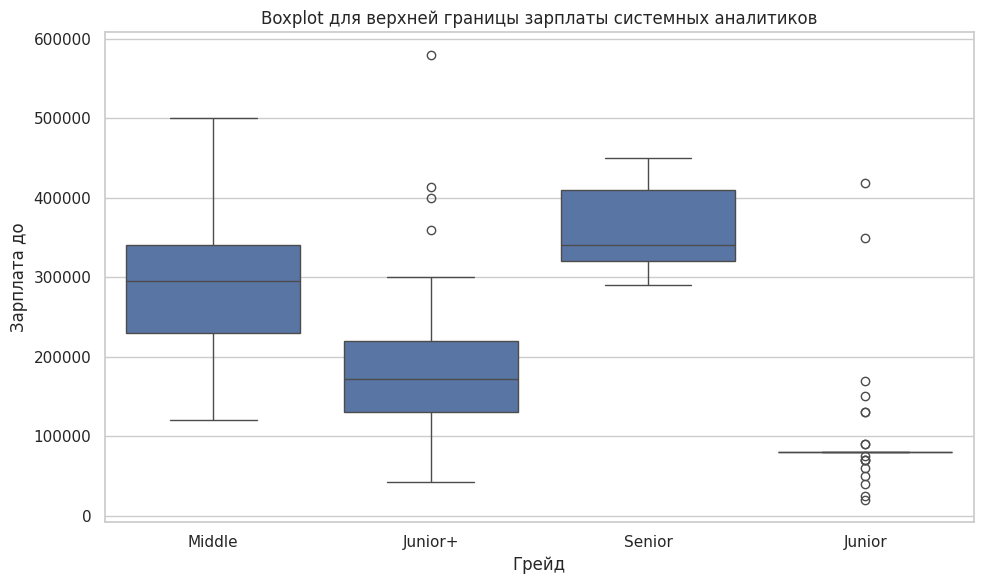

In [ ]:
# Построение боксплота
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_short', y='salary_to', data=sa)

plt.title('Boxplot для верхней границы зарплаты системных аналитиков')
plt.xlabel('Грейд')
plt.ylabel('Зарплата до')

plt.tight_layout()
plt.show()

Медианное предложение по верхней границе растет в зависимости от грейда системного аналитика:
* Junior - 80 тыс. руб.
* Junior+ - 172 тыс. руб.
* Middle - 295 тыс. руб.
* Senior - 340 тыс. руб.

In [ ]:
# Сделаем свод по полю salary_bin для вакансий системных аналитиков
sa_salary_bin = sa.pivot_table(index='salary_bin',
                               columns='experience_short',
                               values='id',
                               aggfunc='count').reset_index()

sa_salary_bin = sa_salary_bin.fillna(0)

sa_salary_bin.columns = ['salary_bin','Junior','Junior+','Middle','Senior']
sa_salary_bin

,salary_bin,Junior,Junior+,Middle,Senior
0,Больше 300 тысяч,2.0,8.0,66.0,6.0
1,ЗП не указана,48.0,748.0,798.0,37.0
2,Меньше 100 тысяч,32.0,9.0,0.0,0.0
3,От 100 тысяч до 200 тысяч,4.0,52.0,19.0,0.0
4,От 200 тысяч до 300 тысяч,0.0,33.0,47.0,1.0


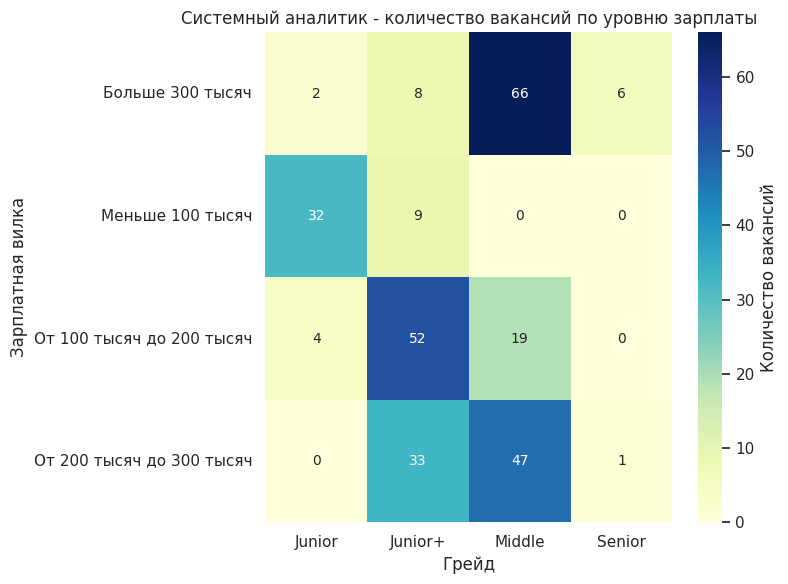

In [ ]:
# Визуализируем полученные данные с помощью хитмэпа

sa_salary_bin_heatmap = sa_salary_bin.query('salary_bin!="ЗП не указана"').set_index('salary_bin')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(sa_salary_bin_heatmap,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            cbar_kws={'label': 'Количество вакансий'},
            annot_kws={"size": 10})

plt.title('Системный аналитик - количество вакансий по уровню зарплаты')
plt.xlabel('Грейд')
plt.ylabel('Зарплатная вилка')

plt.tight_layout()
plt.show()

#### 4.2.3. Тип занятости

In [ ]:
# Сделаем сводную таблицу по типам занятости системных аналитиков в разрезе грейдов
sa_employment = sa.pivot_table(index='employment',
                               columns='experience_short',
                               values='id',
                               aggfunc='count').reset_index()

sa_employment = sa_employment.fillna(0)

sa_employment.columns = ['employment','Junior','Junior+','Middle','Senior']

sa_employment.set_index('employment', inplace=True)

sa_employment

,Junior,Junior+,Middle,Senior
employment,,,,
Полная занятость,56.0,849.0,923.0,44.0
Проектная работа,0.0,1.0,2.0,0.0
Стажировка,29.0,0.0,0.0,0.0
Частичная занятость,1.0,0.0,5.0,0.0


<Figure size 800x800 with 0 Axes>

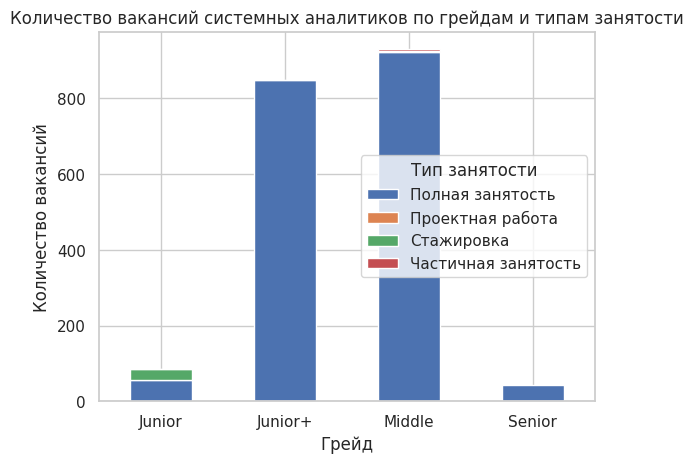

In [ ]:
# Визуализируем полученные данные при помощи stacked bar plot
plt.figure(figsize=(8, 8))
sa_employment.T.plot(kind='bar', stacked=True)

plt.title('Количество вакансий системных аналитиков по грейдам и типам занятости')
plt.xlabel('Грейд')
plt.ylabel('Количество вакансий')
plt.legend(title='Тип занятости')
plt.xticks(rotation=0)
plt.show();

**Выводы по типу занятости системных аналитиков**


Практически все вакансии системных аналитиков кроме уровня Junior предполагают полную занятость. Для Junior 64% вакансий - полная занятость, 34% - стажировки.

#### 4.2.4. График работы

In [ ]:
# Сделаем сводную таблицу по графикам работы в разрезе грейдов
sa_schedule = sa.pivot_table(index='schedule',
                               columns='experience_short',
                               values='id',
                               aggfunc='count').reset_index()

sa_schedule = sa_schedule.fillna(0)

sa_schedule.columns = ['schedule','Junior','Junior+','Middle','Senior']

sa_schedule.set_index('schedule', inplace=True)

sa_schedule

,Junior,Junior+,Middle,Senior
schedule,,,,
Гибкий график,6.0,36.0,17.0,2.0
Полный день,51.0,552.0,571.0,25.0
Сменный график,0.0,0.0,1.0,0.0
Удаленная работа,29.0,262.0,341.0,17.0


In [ ]:
17 / (2+25+17)

0.38636363636363635

<Figure size 1000x800 with 0 Axes>

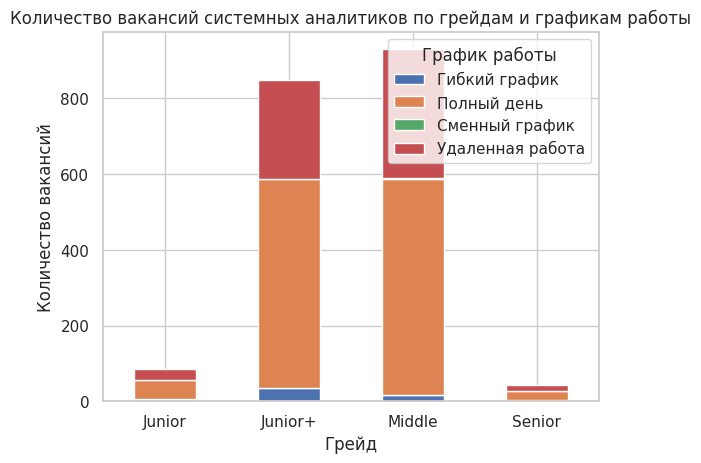

In [ ]:
# Визуализируем полученные данные при помощи stacked bar plot
plt.figure(figsize=(10, 8))
sa_schedule.T.plot(kind='bar', stacked=True)

plt.title('Количество вакансий системных аналитиков по грейдам и графикам работы')
plt.xlabel('Грейд')
plt.ylabel('Количество вакансий')
plt.legend(title='График работы')
plt.xticks(rotation=0)
plt.show();

**Выводы по графику работы системных аналитиков**

В отличие от вакансий аналитиков данных, доля вакансий, предполагающих возможность удаленной работы значительно выше:
* Junior - 34%
* Junior+ - 31%
* Middle - 37%
* Senior - 39%

Нет существенной разницы между возможностью удаленной работы и грейдом

#### 4.2.5. Выводы по типичному месту работы системного аналитика

* Больше всего системных аналитиков требуются в СБЕРе, Т1 (многопрофильный ИТ холдинг), и Aston. Количество вакансий системных аналитиков в ТОП компаний меньше чем вакансий аналитиков данных.
* Если посмотреть на сферу деятельности компаний, то больше всего системные аналитики востребованы в финансовом секторе, многопрофильных ИТ компаниях, консалтинге, телекоме
* В разрезе грейдов - самые востребованный Junior+ и Middle. Вакансий для Junior - значительно меньше по сравнению с вакансиями аналитиков данных. То есть к системным аналитикам предьъявляются более высокие требования к опыту работы.

Входной порогог для системного аналитика выше чем для аналитика данных, в вакансиях предъявляются большие требования по опыту работы.

Медианное предложение по нижней границе растет в зависимости от грейда системного аналитика:
* Junior - 70 тыс. руб.
* Junior+ - 120 тыс. руб.
* Middle - 200 тыс. руб.
* Senior - 200 тыс. руб.

Медианное предложение по верхней границе растет в зависимости от грейда системного аналитика:
* Junior - 80 тыс. руб.
* Junior+ - 172 тыс. руб.
* Middle - 295 тыс. руб.
* Senior - 340 тыс. руб.

Практически все вакансии системных аналитиков кроме уровня Junior предполагают полную занятость. Для Junior 64% вакансий - полная занятость, 34% - стажировки.

В отличие от вакансий аналитиков данных, доля вакансий, предполагающих возможность удаленной работы значительно выше:
* Junior - 34%
* Junior+ - 31%
* Middle - 37%
* Senior - 39%

Нет существенной разницы между возможностью удаленной работы и грейдом

### 4.3. Выводы по исследованию типичного места работы аналитика

**Типичное рабочее место аналитика данных**

* Основные работодатели - компании из финансового секторы (СБЕР, ВТБ), маркетплейсы (OZON, WILDBERRIES), телеком, прочие IT компании
* Зарплаты:
  * Junior: 60-80 тыс. руб.
  * Junior+: 90-120 тыс. руб.
  * Middle: 155-234 тыс. руб.
  * Senior: 200-240 тыс. руб.
* Тип занятости:
  * Junior: Полная занятость, стажировки - 11%
  * Junior+-Senior: Полная занятость
* График работы:
  * Junior: Полный день, удаленная работа - 11%
  * Junior+: Полный день, удаленная работа - 14%
  * Middle: Полный день, удаленная работа - 24%
  * Senior: Полный день, удаленная работа - 38%



**Типичное рабочее место системного аналитика**
* Основные работодатели - компании из финансового секторы (СБЕР, Совкомбанк, ПСБ, Т-Банк), многопрофильны ИТ компании (Т1, Aston, Прикладные технологии), консалтинг (Selecty, IBS), телеком (Ростелеком, билайн, МТС)
* Зарплаты:
  * Junior: 70-80 тыс. руб.
  * Junior+: 120-172 тыс. руб.
  * Middle: 200-295 тыс. руб.
  * Senior: 200-340 тыс. руб.
* Тип занятости:
  * Junior: Полная занятость (64%), стажировки - 34%
  * Junior+-Senior: Полная занятость
* График работы:
  * Полный рабочий день для всех грейдов с возможностью удаленной работы 31-39%


<a id="hard_soft_skills"></a>
## 5. Требования к Hard и Softskills

### 5.1. Какие навыки спрашивают чаще - твердые или мягкие?

In [ ]:
# Сделаем срез по вакансиям с заполненными hard skils по аналитикам данных и системным аналитикам
hs_da = da.query('hard_skills_from_description!="НД"') # аналитики данных
hs_sa = sa.query('hard_skills_from_description!="НД"') # системные аналитики

In [ ]:
print('DA: требований hard skills:', hs_da.shape[0], 'Доля от всех вакансий:', round(hs_da.shape[0]/da.shape[0]*100,1),'%')
print('SA: требований hard skills:', hs_sa.shape[0], 'Доля от всех вакансий:', round(hs_sa.shape[0]/sa.shape[0]*100,1),'%')


DA: требований hard skills: 418 Доля от всех вакансий: 23.2 %
SA: требований hard skills: 567 Доля от всех вакансий: 29.7 %


In [ ]:
# Сделаем срез по вакансиям с заполненными soft skils по аналитикам данных и системным аналитикам
ss_da = da.query('soft_skills_from_description!="НД"') # аналитики данных
ss_sa = sa.query('soft_skills_from_description!="НД"') # системные аналитики

In [ ]:
print('DA: требований soft skills:', ss_da.shape[0], 'Доля от всех вакансий:', round(ss_da.shape[0]/da.shape[0]*100,1),'%')
print('SA: требований soft skills:', ss_sa.shape[0], 'Доля от всех вакансий:', round(ss_sa.shape[0]/sa.shape[0]*100,1),'%')

DA: требований soft skills: 588 Доля от всех вакансий: 32.6 %
SA: требований soft skills: 1423 Доля от всех вакансий: 74.5 %


In [ ]:
skills_data = {
    'skill':['hard', 'hard', 'soft', 'soft'],
    'label':['DA', 'SA', 'DA', 'SA'],
    'quantity':[hs_da.shape[0], hs_sa.shape[0], ss_da.shape[0], ss_sa.shape[0]],
    'share':[round(hs_da.shape[0]/da.shape[0]*100,1),round(hs_sa.shape[0]/sa.shape[0]*100,1),round(ss_da.shape[0]/da.shape[0]*100,1),round(ss_sa.shape[0]/sa.shape[0]*100,1)]
}

skills_df = pd.DataFrame(skills_data)

skills_df

,skill,label,quantity,share
0,hard,DA,418,23.2
1,hard,SA,567,29.7
2,soft,DA,588,32.6
3,soft,SA,1423,74.5


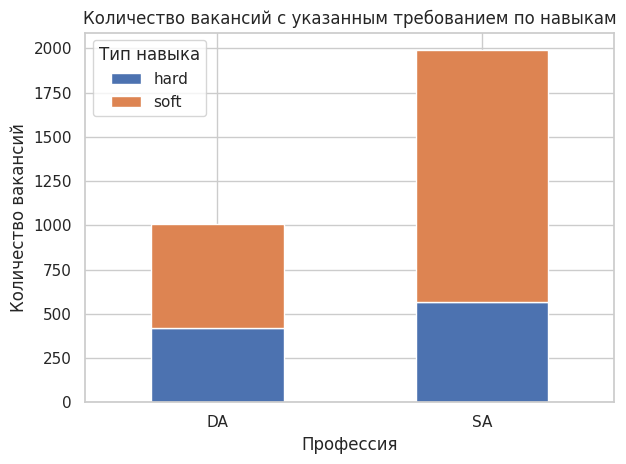

In [ ]:
# Пивотируем датафрейм для построения графика
pivot_skills_df = skills_df.pivot(index='label', columns='skill', values='quantity')

# Строим stacked barplot
pivot_skills_df.plot(kind='bar', stacked=True)

# Настраиваем график
plt.title('Количество вакансий c указанным требованием по навыкам')
plt.xlabel('Профессия')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)  # Поворачиваем метки по оси X
plt.legend(title='Тип навыка')
plt.tight_layout()  # Подгоняем график под размеры окна

# Показываем график
plt.show()

Из полученных данных видна большая разница по количеству требований мягких и твердых навыков между аналитиками данных и системными аналитиками.


Так количество вакансий с требуемыми твердыми навыками для аналитиков данных и системными аналитиками отличается на 6%, в то время как количество вакансий с требованием мягких навыков у системных анаолитиков выше на 42%

### 5.2. К какому грейду и к какой специалтности требований больше

In [ ]:
# Проверим требования по навыкам в разрезе грейдов для аналитиков данных
all_hard_skills = clear_df.query('hard_skills_from_description!="НД"')

all_hard_skills_pivot = all_hard_skills.pivot_table(index='label',
                                                    columns='experience_short',
                                                    values='id',
                                                    aggfunc='count').reset_index()

all_hard_skills_pivot['skill_type'] = 'hard'

all_hard_skills_pivot

experience_short,label,Junior,Junior+,Middle,Senior,skill_type
0,DA,23,241,146,8,hard
1,SA,10,239,305,13,hard


In [ ]:
all_soft_skills = clear_df.query('soft_skills_from_description!="НД"')

all_soft_skills_pivot = all_soft_skills.pivot_table(index='label',
                                                    columns='experience_short',
                                                    values='id',
                                                    aggfunc='count').reset_index()

all_soft_skills_pivot['skill_type'] = 'soft'

all_soft_skills_pivot

experience_short,label,Junior,Junior+,Middle,Senior,skill_type
0,DA,45,359,175,9,soft
1,SA,55,627,711,30,soft


In [ ]:
all_skills_pivot = pd.concat([all_hard_skills_pivot,all_soft_skills_pivot],ignore_index=True)
#all_skills_pivot = all_skills_pivot.set_index('label')
all_skills_pivot.columns = ['label','Junior', 'Junior+', 'Middle', 'Senior', 'skill_type']
all_skills_pivot

,label,Junior,Junior+,Middle,Senior,skill_type
0,DA,23,241,146,8,hard
1,SA,10,239,305,13,hard
2,DA,45,359,175,9,soft
3,SA,55,627,711,30,soft


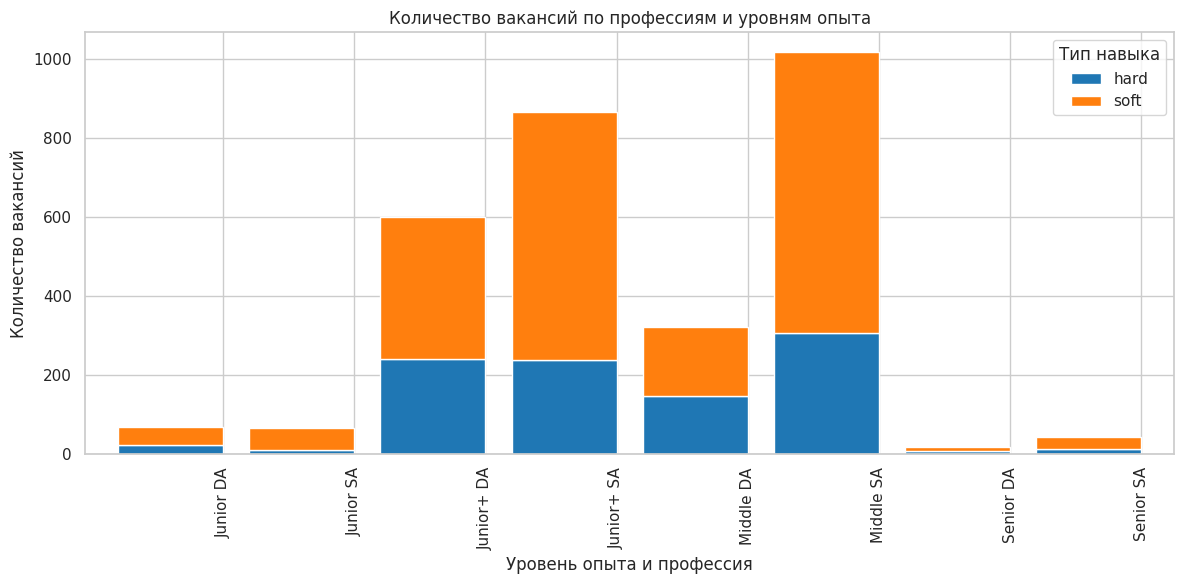

In [ ]:
# Подготовка данных для построения stacked barplot
# Преобразуем данные в длинный формат
stacked_data = all_skills_pivot.melt(id_vars=['label', 'skill_type'],
                                       value_vars=['Junior', 'Junior+', 'Middle', 'Senior'],
                                       var_name='experience_level',
                                       value_name='quantity')

# Создаем комбинированные метки для оси X
stacked_data['combined_label'] = stacked_data['experience_level'] + ' ' + stacked_data['label']

# Создаем сводную таблицу для построения графика
pivot_table = stacked_data.pivot_table(index='combined_label',
                                        columns='skill_type',
                                        values='quantity',
                                        fill_value=0).reset_index()

# Строим stacked barplot
fig, ax = plt.subplots(figsize=(12, 6))

# Для каждого типа навыка строим отдельные столбцы
pivot_table.plot(kind='bar', x='combined_label', stacked=True, ax=ax,
                 color=['#1f77b4', '#ff7f0e'],
                 position=1, width=0.8)


plt.title('Количество вакансий по профессиям и уровням опыта')
plt.xlabel('Уровень опыта и профессия')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=90)

plt.legend(title='Тип навыка')

plt.tight_layout()

plt.show();

Из полученного графика видно, что наименьшее количество требований в вакансиях предъявляется к Junior и Senior.

Больше всего требований предъявляется к вакансиям уровня Junior+ и Middle. При этом требований для професси системного аналитика существенно больше чем для аналитиков данных. Также видно, что софт скилы требуются значительно чаще чем хард скилы.

### 5.3. Наиболее желаемые кандидаты на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils

#### 5.3.1. Аналитик данных: самые важные hard-skils, самые важные soft-skils

In [ ]:
# Сделаем сводную таблицу по hard-skils
hard_skils_da = hs_da.pivot_table(index='hard_skills_from_description',
                                  values='id',
                                  columns='experience_short',
                                  aggfunc='count').reset_index()

hard_skils_da = hard_skils_da.fillna(0)

hard_skils_da.columns = ['hard_skill','Junior','Junior+','Middle', 'Senior']

hard_skils_da['total_vacancies'] = hard_skils_da['Junior'] + hard_skils_da['Junior+'] + hard_skils_da['Middle'] + hard_skils_da['Senior']

hard_skils_da = hard_skils_da.sort_values(by='total_vacancies', ascending=False)

hard_skils_da

,hard_skill,Junior,Junior+,Middle,Senior,total_vacancies
1,Pandas,19.0,151.0,92.0,1.0,263.0
5,confluence,3.0,47.0,38.0,1.0,89.0
3,"Pandas, confluence",0.0,21.0,6.0,3.0,30.0
7,Юнит-экономика,1.0,15.0,9.0,3.0,28.0
4,"Pandas, Юнит-экономика",0.0,4.0,0.0,0.0,4.0
0,Google Sheets,0.0,2.0,0.0,0.0,2.0
2,"Pandas, Google Sheets",0.0,0.0,1.0,0.0,1.0
6,Математическая статистика,0.0,1.0,0.0,0.0,1.0


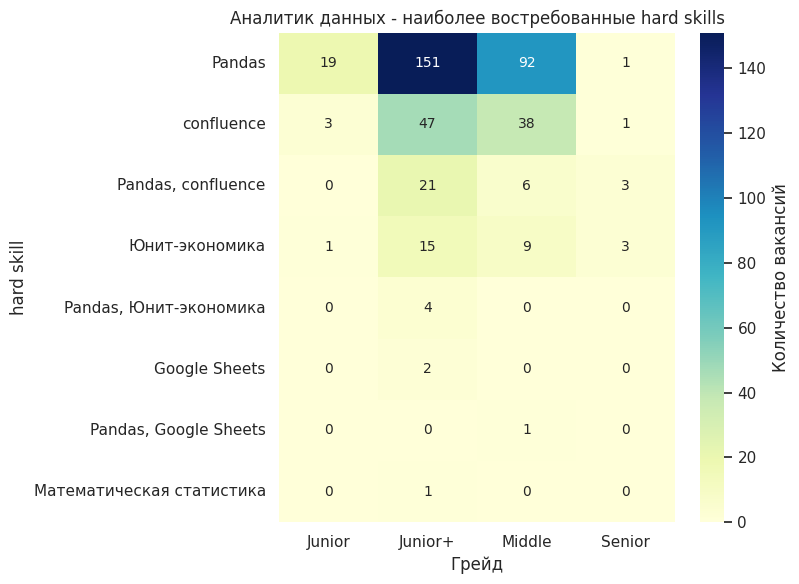

In [ ]:
# Удалим столбец с общим количеством вакансий
heatmap_da_hard_skills = hard_skils_da.drop(columns=['total_vacancies']).set_index('hard_skill')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_da_hard_skills,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            cbar_kws={'label': 'Количество вакансий'},
            annot_kws={"size": 10})

# Настройка заголовка и меток осей
plt.title('Аналитик данных - наиболее востребованные hard skills')
plt.xlabel('Грейд')
plt.ylabel('hard skill')

# Отображение графика
plt.tight_layout()
plt.show()

Таким образом наиболее востребованные hard skills для аналитиков данных:
* Junior: Pandas
* Junior+: Pandas, Confluence, Юнит-экономика
* Middle: Pandas, Confluence
* Senior: явные требования не выделяются

In [ ]:
# Проверим soft skills для аналитиков данных

# Преобразуем колонку в строковом представлении
da_skills_series = ss_da['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
da_all_skills = [skill for sublist in da_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
da_skills_count = pd.Series(da_all_skills).value_counts()
da_skills_count = da_skills_count.head(5)

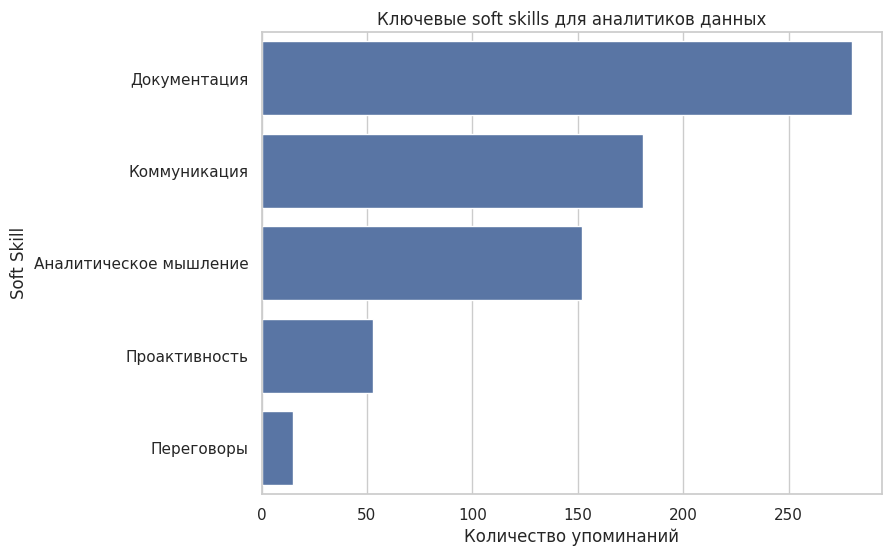

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=da_skills_count.values, y=da_skills_count.index, orient='h')

plt.title('Ключевые soft skills для аналитиков данных')
plt.xlabel('Количество упоминаний')
plt.ylabel('Soft Skill')

# Отображение графика
plt.show();

Самые востребованные soft skills для аналитиков данных - документация, коммуникация, аналитическое мышление, проактивность, переговоры.

Проверим как меняется набор скилов в зависимости от грейда

In [ ]:
# Топ soft skills для DA Junior

# Преобразуем колонку в строковом представлении
da_junior_skills_series = ss_da.query('experience_short=="Junior"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_da_junior = [skill for sublist in da_junior_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
da_junior_skills_count = pd.Series(all_skills_da_junior).value_counts()
da_junior_skills_count = da_junior_skills_count.head(5)

da_junior_skills_count

,count
Коммуникация,17
Документация,17
Аналитическое мышление,15
Проактивность,6
Креативность,3


In [ ]:
# Топ soft skills для DA Junior+

# Преобразуем колонку в строковом представлении
da_junior_plus_skills_series = ss_da.query('experience_short=="Junior+"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_da_junior_plus = [skill for sublist in da_junior_plus_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
da_junior_plus_skills_count = pd.Series(all_skills_da_junior_plus).value_counts()
da_junior_plus_skills_count = da_junior_plus_skills_count.head(5)

da_junior_plus_skills_count

,count
Документация,150
Аналитическое мышление,114
Коммуникация,105
Проактивность,29
Креативность,7


In [ ]:
# Топ soft skills для DA Middle

# Преобразуем колонку в строковом представлении
da_middle_skills_series = ss_da.query('experience_short=="Middle"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_da_middle = [skill for sublist in da_middle_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
da_middle_skills_count = pd.Series(all_skills_da_middle).value_counts()
da_middle_skills_count = da_middle_skills_count.head(5)

da_middle_skills_count

,count
Документация,109
Коммуникация,56
Аналитическое мышление,22
Проактивность,15
Переговоры,7


In [ ]:
# Топ soft skills для DA Senior

# Преобразуем колонку в строковом представлении
da_senior_skills_series = ss_da.query('experience_short=="Senior"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_da_senior = [skill for sublist in da_senior_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
da_senior_skills_count = pd.Series(all_skills_da_senior).value_counts()
da_senior_skills_count = da_senior_skills_count.head(5)

da_senior_skills_count

,count
Документация,4
Коммуникация,3
Проактивность,3
Презентация результатов,3
Решение проблем,2


Ключевые soft skill аналитиков данных по грейдам в порядке убывания значимости:
* Junior: Коммуникация, документация, аналитическое мышление, проактивность, креативность
* Junior+: Документация, аналитическое мышление,коммуникация, проактивность, креативность
* Middle: Документация,коммуникация, аналитическое мышление, проактивность, переговоры
* Senior: Документация, коммуникация, проактивность, презентация результатов, решение проблем

Если подытожить, то для Junior самый важный навык - коммуникация с коллегами, а потом уже работа с документацией, аналитическое мышление и т.д.

Для аналитиков данных уровня Junior+ и Middle ключевые навыки - документация, коммуникация, аналитическое мышление.

У аналитиков данных уровня Senior помимо документации и коммуникаций важными стоановятся навыки - презентация результатов и решение проблем.

#### 5.3.2. Системный аналитик: самые важные hard-skils, самые важные soft-skils

In [ ]:
# Сделаем сводную таблицу по hard-skils
hard_skils_sa = hs_sa.pivot_table(index='hard_skills_from_description',
                                  values='id',
                                  columns='experience_short',
                                  aggfunc='count').reset_index()

hard_skils_sa = hard_skils_sa.fillna(0)

hard_skils_sa.columns = ['hard_skill','Junior','Junior+','Middle', 'Senior']

hard_skils_sa['total_vacancies'] = hard_skils_sa['Junior'] + hard_skils_sa['Junior+'] + hard_skils_sa['Middle'] + hard_skils_sa['Senior']

hard_skils_sa = hard_skils_sa.sort_values(by='total_vacancies', ascending=False)

hard_skils_sa

,hard_skill,Junior,Junior+,Middle,Senior,total_vacancies
1,confluence,10.0,231.0,293.0,10.0,544.0
3,Юнит-экономика,0.0,4.0,5.0,2.0,11.0
2,"confluence, Юнит-экономика",0.0,2.0,6.0,1.0,9.0
0,Pandas,0.0,2.0,1.0,0.0,3.0


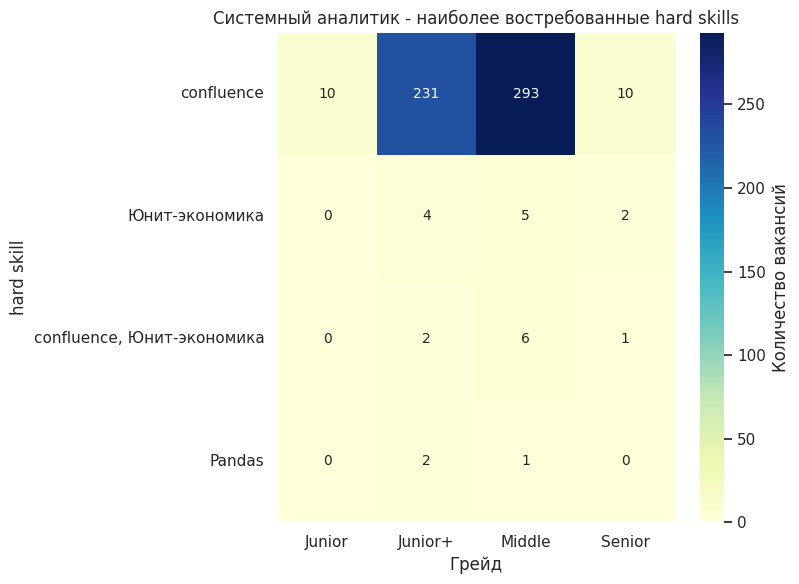

In [ ]:
# Удалим столбец с общим количеством вакансий
heatmap_sa_hard_skills = hard_skils_sa.drop(columns=['total_vacancies']).set_index('hard_skill')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_sa_hard_skills,
            annot=True,
            fmt='g',
            cmap="YlGnBu",
            cbar_kws={'label': 'Количество вакансий'},
            annot_kws={"size": 10})

# Настройка заголовка и меток осей
plt.title('Системный аналитик - наиболее востребованные hard skills')
plt.xlabel('Грейд')
plt.ylabel('hard skill')

# Отображение графика
plt.tight_layout()
plt.show()

Таким образом самый востребованный hard skill для системных аналитиков - confluence (инструмент для разработки документации), особенно часто это требование встречается для грейдов Junior+ и Middle.

In [ ]:
# Проверим soft skills для системных аналитиков

# Преобразуем колонку в строковом представлении
sa_skills_series = ss_sa['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
sa_all_skills = [skill for sublist in sa_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
sa_skills_count = pd.Series(sa_all_skills).value_counts()
sa_skills_count = sa_skills_count.head(5)

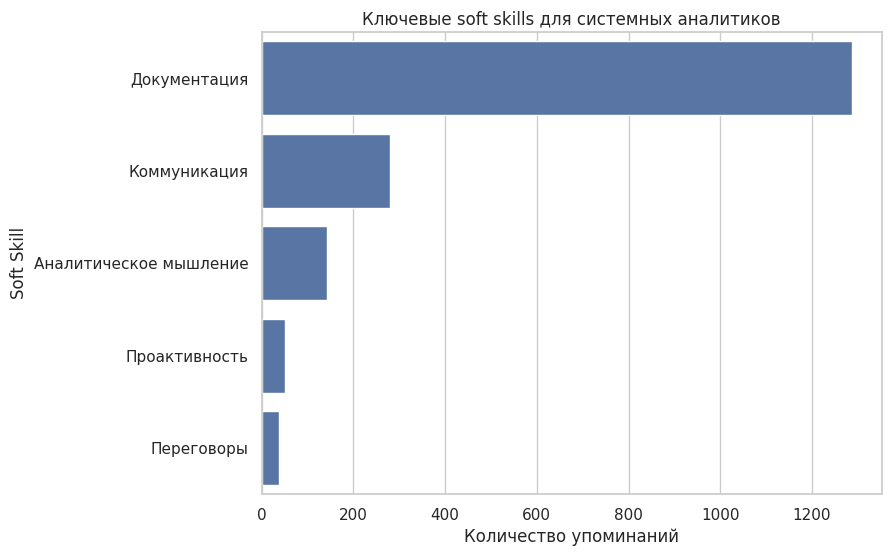

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sa_skills_count.values, y=sa_skills_count.index, orient='h')

plt.title('Ключевые soft skills для системных аналитиков')
plt.xlabel('Количество упоминаний')
plt.ylabel('Soft Skill')

# Отображение графика
plt.show();

Самые востребованные soft skills для системных аналитиков - документация, коммуникация, аналитическое мышление, проактивность, переговоры.

В отличие от вакансий аналитиков данных количество упоминаний навыков в разы больше для вакансий системных аналитиков

Проверим как меняется набор скилов в зависимости от грейда

In [ ]:
# Топ soft skills для SA Junior

# Преобразуем колонку в строковом представлении
sa_junior_skills_series = ss_sa.query('experience_short=="Junior"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_sa_junior = [skill for sublist in sa_junior_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
sa_junior_skills_count = pd.Series(all_skills_sa_junior).value_counts()
sa_junior_skills_count = sa_junior_skills_count.head(5)

sa_junior_skills_count

,count
Документация,50
Аналитическое мышление,21
Коммуникация,8
Проактивность,1
Креативность,1


In [ ]:
# Топ soft skills для SA Junior+

# Преобразуем колонку в строковом представлении
sa_junior_plus_skills_series = ss_sa.query('experience_short=="Junior+"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_sa_junior_plus = [skill for sublist in sa_junior_plus_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
sa_junior_plus_skills_count = pd.Series(all_skills_sa_junior_plus).value_counts()
sa_junior_plus_skills_count = sa_junior_plus_skills_count.head(5)

sa_junior_plus_skills_count

,count
Документация,553
Коммуникация,127
Аналитическое мышление,81
Проактивность,23
Переговоры,17


In [ ]:
# Топ soft skills для SA Middle

# Преобразуем колонку в строковом представлении
sa_middle_skills_series = ss_sa.query('experience_short=="Middle"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_sa_middle = [skill for sublist in sa_middle_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
sa_middle_skills_count = pd.Series(all_skills_sa_middle).value_counts()
sa_middle_skills_count = sa_middle_skills_count.head(5)

sa_middle_skills_count

,count
Документация,655
Коммуникация,138
Аналитическое мышление,40
Проактивность,27
Переговоры,20


In [ ]:
# Топ soft skills для SA Senior

# Преобразуем колонку в строковом представлении
sa_senior_skills_series = ss_sa.query('experience_short=="Senior"')['soft_skills_from_description'].apply(lambda x: x.split(', '))

# Разворачиваем список навыков в единый список
all_skills_sa_senior = [skill for sublist in sa_senior_skills_series for skill in sublist]

# Подсчитываем вхождение каждого навыка
sa_senior_skills_count = pd.Series(all_skills_sa_senior).value_counts()
sa_senior_skills_count = sa_senior_skills_count.head(5)

sa_senior_skills_count

,count
Документация,29
Коммуникация,7
Переговоры,2
Креативность,2


Ключевые soft skill системных аналитиков по грейдам в порядке убывания значимости:
* Junior: Документация, аналитическое мышление, коммуникация,  проактивность, креативность
* Junior+: Документация, коммуникация, аналитическое мышление, проактивность, переговоры
* Middle: Документация,коммуникация, аналитическое мышление, проактивность, переговоры
* Senior: Документация, коммуникация, переговоры, креативность

Таким образом самые востребованные soft skill для всех грейдов системных аналитиков - документация, коммуникации и аналитическое мышление

### 5.4. Выводы по исследования требований к hard и soft skills для вакансий аналитиков данных и системных аналитиков

* Из полученных данных видна большая разница по количеству требований мягких и твердых навыков между аналитиками данных и системными аналитиками.
Так количество вакансий с требуемыми твердыми навыками для аналитиков данных и системными аналитиками отличается на 6%, в то время как количество вакансий с требованием мягких навыков у системных анаолитиков выше на 42%

* Наименьшее количество требований в вакансиях предъявляется к Junior и Senior.
Больше всего требований предъявляется к вакансиям уровня Junior+ и Middle. При этом требований для професси системного аналитика существенно больше чем для аналитиков данных. Также видно, что софт скилы требуются значительно чаще чем хард скилы.

* Наиболее востребованные hard skills для аналитиков данных:
  * Junior: Pandas
  * Junior+: Pandas, Confluence, Юнит-экономика
  * Middle: Pandas, Confluence
  * Senior: явные требования не выделяются

* Ключевые soft skill аналитиков данных по грейдам в порядке убывания значимости:
  * Junior: Коммуникация, документация, аналитическое мышление, проактивность, креативность
  * Junior+: Документация, аналитическое мышление,коммуникация, проактивность, креативность
  * Middle: Документация,коммуникация, аналитическое мышление, проактивность, переговоры
  * Senior: Документация, коммуникация, проактивность, презентация результатов, решение проблем

Для Junior самый важный навык - коммуникация с коллегами, а потом уже работа с документацией, аналитическое мышление и т.д.

Для аналитиков данных уровня Junior+ и Middle ключевые навыки - документация, коммуникация, аналитическое мышление.

У аналитиков данных уровня Senior помимо документации и коммуникаций важными стоановятся навыки презентация результатов и решение проблем.



* Самый востребованный hard skill для системных аналитиков - confluence (инструмент для разработки документации), особенно часто это требование встречается для грейдов Junior+ и Middle.

* Ключевые soft skill системных аналитиков по грейдам в порядке убывания значимости:
  * Junior: Документация, аналитическое мышление, коммуникация,  проактивность, креативность
  * Junior+: Документация, коммуникация, аналитическое мышление, проактивность, переговоры
  * Middle: Документация,коммуникация, аналитическое мышление, проактивность, переговоры
  * Senior: Документация, коммуникация, переговоры, креативность

<a id="total_summary"></a>
## 6. Общие выводы и рекомендации

Полученные в ходе исследования данные сведены в таблицу ниже:

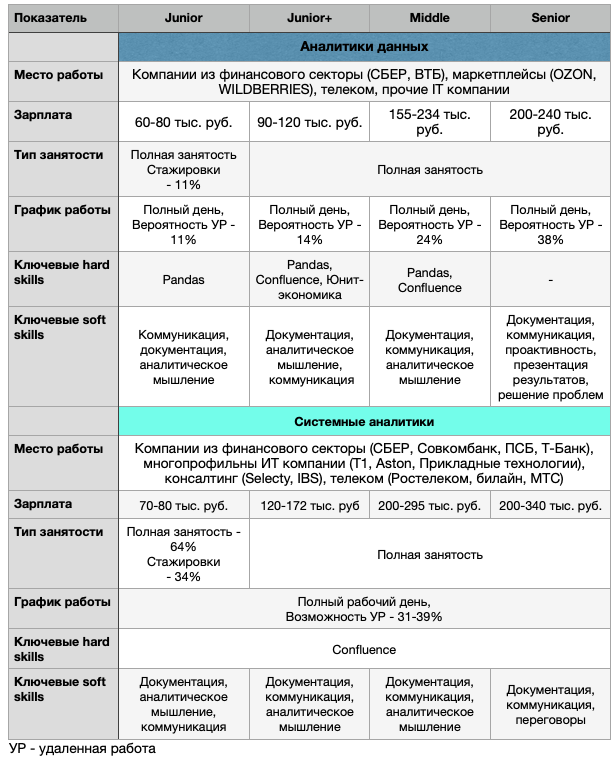

**Аналитик данных** (ещё Data Analyst и дата-аналитик) — это специалист, который работает с данными: собирает их, обрабатывает, изучает и интерпретирует. Выводы, которые делает аналитик, помогают принимать решения в бизнесе, в научных исследованиях, в менеджменте и в других областях.


**Системный аналитик** разрабатывает требования к программному обеспечению. Заказчик или владелец продукта определяет, что должна делать программа. После этого системный аналитик общается с заказчиком или владельцем продукта, добывает информацию из разных источников и изучает рынок.


* Между вакансиями Аналитиков данных и Системных аналитиков обнаружена значительная разница в требованиях к опыту.Так среди вакансий аналитиков данных 61% - Junior+ (опыт от года до трех лет), для системных аналитиков - 45%.

* В вакансиях системных аналитиков требуется больше мидлов (опыт от 3 до 6 лет) - 49%, среди аналитиков данных таких вакансий - 31%

* В вакансиях по обоим профессиям меньше всего требуется Junior (опыт до года) и Senior (опыт свыше 6 лет.)

* Таким образом порог входа в профессию аналитика ниже у аналитиков данных - в вакансиях чаще встречаются предложения для Junior (8% против 5 для системных аналитиков), также значительно выше спрос на Junior+ (опыт от года)

* Также можно предположить что низкий спрос на Senior связан с тем, что компании берут специалистов с минимально достаточным для работы уровнем и растят их внутри компании и очень редко привлекают с рынка Senior'ов.


**Основные отличия вакансий аналитиков данных и системных аналитиков:**

* **Работодатели:**
  * Аналитик данных чаще требуются в крупных банках и маркетплейсах. Системные аналитики также часто работают в крупных организация финансового сектора, а также в многопрофильных ИТ холдингах и консалтинге.

* **Зарплаты:**
  * Зарплаты системных аналитиков выше чем у аналитиков данных, это касается всех грейдов. Только для уровня Junior зарплаты практически идентичны зарплатам аналитиков данных.

* **Тип занятости:**
  * Для Junior аналитиков данных есть вакансии на стажировки 11%, у Junior системных аналитиков возможность стажировки - 34%, остальные вакансии предполагают полную занятость.
  * Для аналитиков данных и системных аналитиков уровня от Junior+ и выше в основном все вакансии - полная занятость

* **График работы:**
  * Для обоих профессий вакансии предполагают в основном полный рабочий день.
  * В целом для системных аналитиков возможность удаленной работы выше чем для аналитиков данных (без существенной разницы по грейдам)
  * У аналитиков данных возможность удаленной работы растет с ростом грейда.

* **Ключевые hard skills:**
  * Для аналитиков данных ключевые hard skill - Pandas, Confluence, Юнит-экономика. Для системных аналитиков - Confluence.
  * Таким образом системному аналитку не обязательно уметь писать код.

* **Ключевые soft skills:**
  * Для системных аналитиков и аналитиков данных важными soft skill являются документация, коммуникация и аналитическое мышление. Важность того или иного навыка варьируется в зависимости от грейда, но набор этих ключевых навыков остается неизменным.


Резюмируя:
1. Порог входа в профессию для начинающих специалистов ниже у аналитиков данных - больше вакансий для Junior+ и Junior чем у системных аналитиков
2. Для аналитиков данных важный hard skill - Pandas, т.е. они должны уметь писать код на Python. Для системных аналитиков как правило это не требуется, для них важнее работа с документацией.
3. Системные аналитики в среднем зарабатывают больше чем аналитики данных
4. Системные аналитики чаще могут расчитывать на удаленную работу, чем аналитики данных.
5. Работа системного аналитика предполагает большее количество коммуникаций с коллегами, заказчиками и прочими стейхолдерами, поэтому профессия системного аналитика больше подойдет специалистам не избегающих взаимодействия с другими людьми. Работа аналитика данных также предусматривает необходимость коммуникаций, но в меньшей степени, здесь упор идет тна работу с данными, кодом, документацией.

Эти особенности необходимо принимать во внимание при принятии решения о смене сферы деятельности и выборе направления в професси аналитика.
